# "Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости" (Исследовательский анализ данных)

## Описание проекта
Сервису "Яндекс Недвижимость" требуется определить рыночную стоимость объектов недвижимости в Санкт-Петербурге и ЛО за несколько лет. Результаты помогут построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности. Для достижения данной цели требуется провести исследовательский анализ данных для выявления зависимости стоимости объектов недвижимости от различных параметров.

### Загрузка данных
На данном этапе мы загрузим датасет `real_estate_data.csv` в рабочий датафрейм, изучим общую информацию о располагаемых данных, а также построим гистограмму для числовых столбцов.

In [1]:
# подключаем основные библиотеки для работы с данными и их визуализацией
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
# ! pip install missingno   # на случай, если модуль missingno не установлен

Загружаем csv-файл `real_estate_data`

In [2]:
# загружаем csv-файл "real_estate_data"
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

Для получения общей информации о датафрейме выведем первые 5 строк для первичного ознакомления. 

In [3]:
# выведем первые 5 строк датафрейма
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Как мы можем наблюдать, csv-файл использует неконвенциональный разделитель, из-за чего данные не разбиваются на столбцы и отображаются некорректно.
Для решения проблемы загрузим файл повторно с указанием разделителя в параметрах в качестве аргумента.

In [4]:
# загружаем csv-файл "real_estate_data" с указанием разделителя и выводим первые 5 строк
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем основную информацию о данных в файле.

In [5]:
# выведем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как мы можем наблюдать из общей сводки `info()`, датафрейм представлен в 23699 строках и 22 столбцах. Некоторые столбцы имеют меньше значений (например, `parks_nearest` — 8079 из 23699), на основании чего мы можем судить о наличии пропусков в данных. Также мы видим неоднородность типов данных (строки, целочисленные и вещественые данные, а также булевые значения). Данный факт требует более внимательного изучения столбцов и ожидаемых там данных.
Построим гистограммы для всех числовых столбцов. Так, мы увидим адекватность распределения значений, а также столбцы, требующие особого внимания и предобработки.

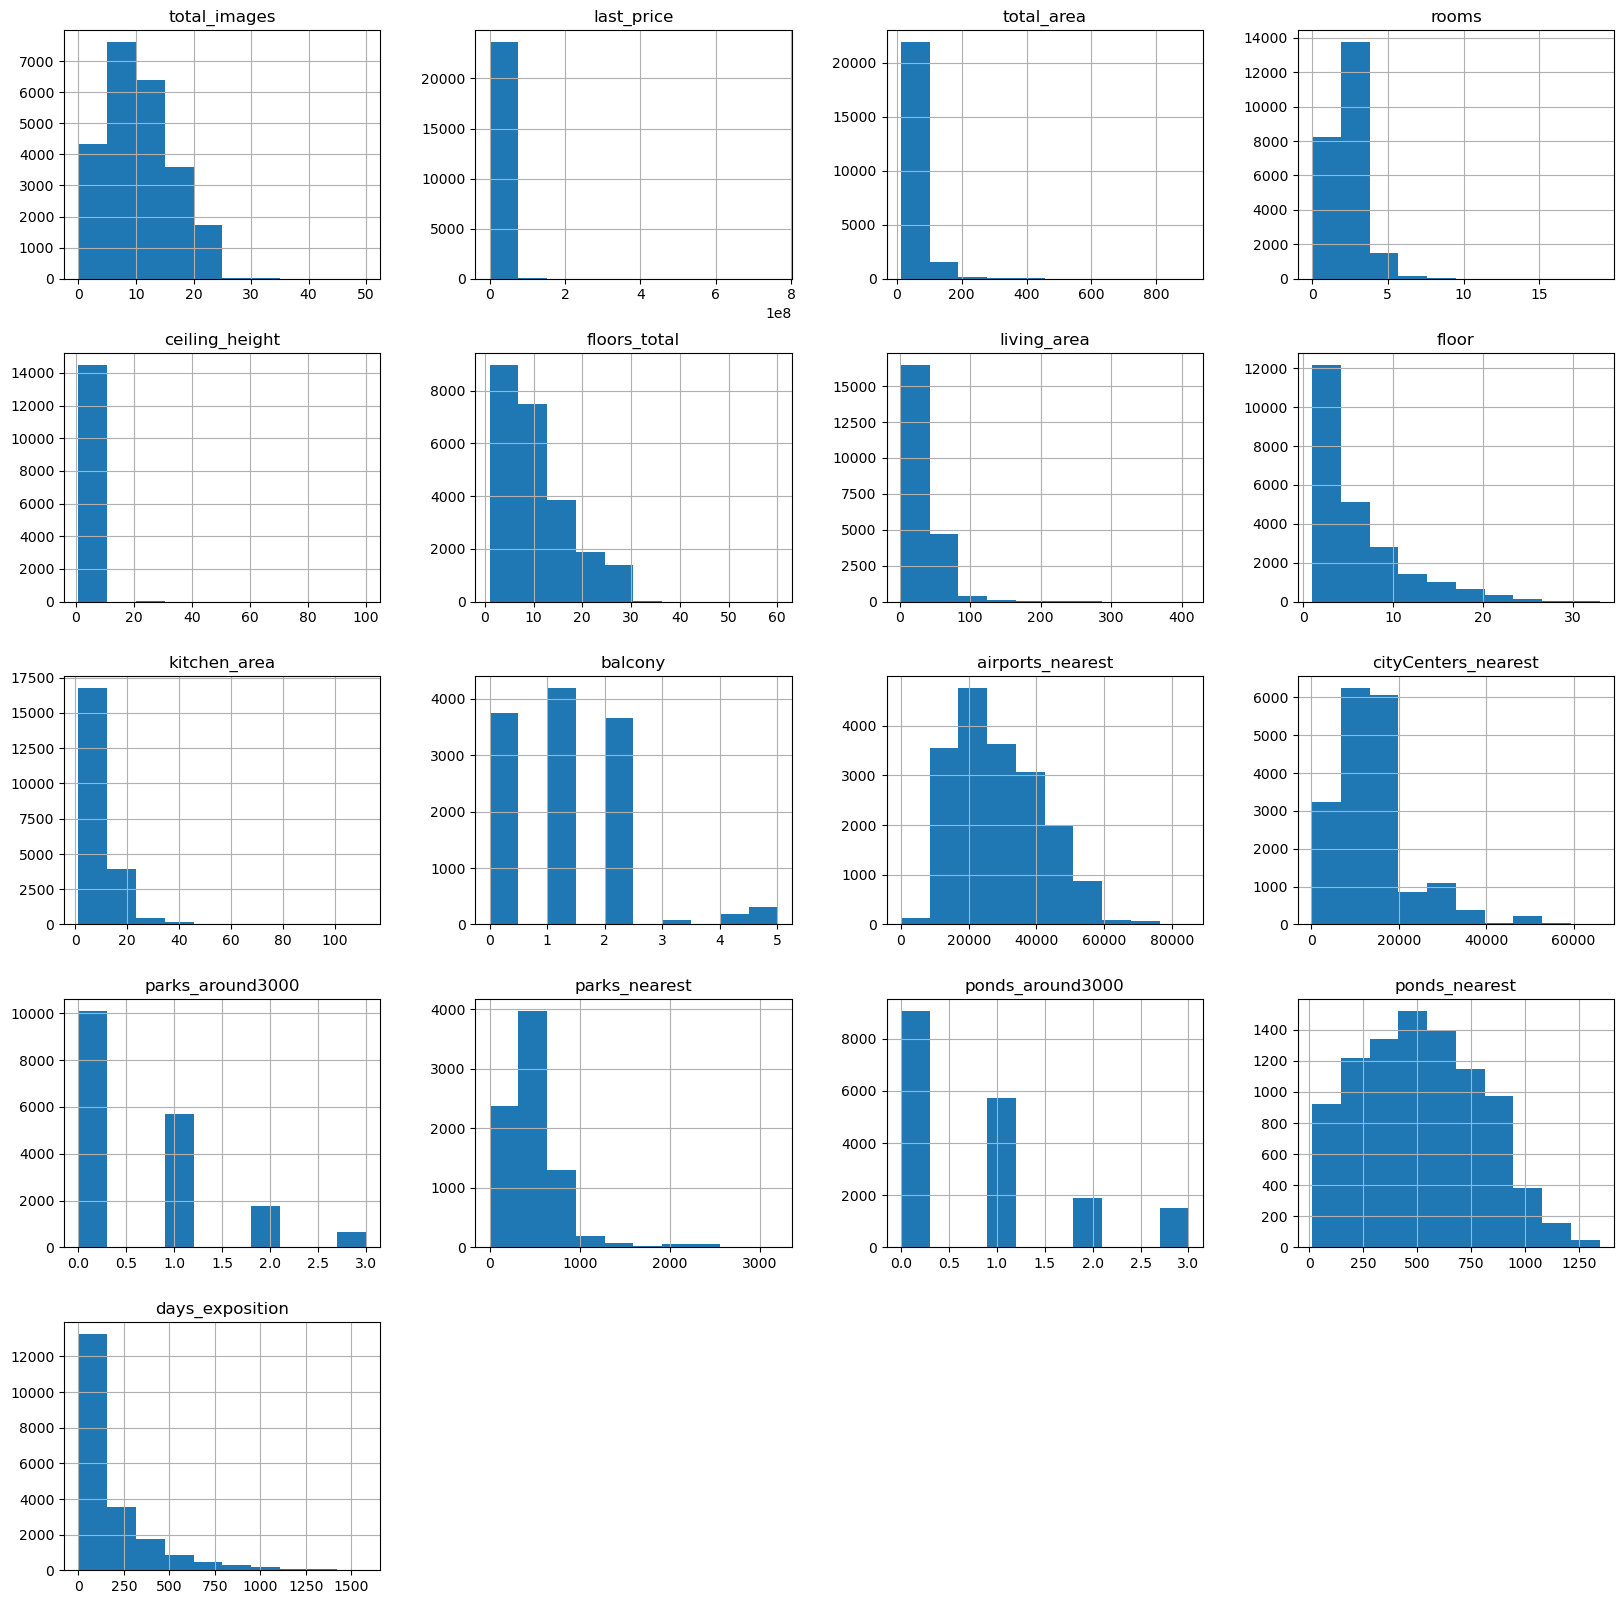

In [6]:
# выведем гистограммы для всех числовых значений
data.hist(figsize=(20, 20))
plt.show()

Полученные гистограммы достаточно сильно отличаются. Так, мы наблюдаем достаточно привычные распределения: нормальное распределение (напр., `ponds_nearest`) и Пуассона (напр., `days_exposition`). Однако наиболее полезным здесь будет обратить внимание на нетипичные распределения, т.к. именно в них вероятнее всего будут артефакты сырых данных (аномалии, пропуски и пр.). В этом отношении следует обратить внимание на распределения с разрывами (напр., `parks_around3000`). Так, в этой гистограмме отражены значения о количестве парков в пределах 3 км, что вполне реалистично (значения отмечены на целочисленных областях), однако возникают вопросы касаемо оси x и ее деления с дробными значениями. Это может указывать на некорретный тип данных, что требует особого внимания и корректировки на этапе EDA.

### Предобработка данных

На данном этапе нам необходимо определить, в каких столбцах есть пропуски, а также заполнить их там, где это возможно. Дополнительно проверим все ли столбцы имеют соответствующий тип данных и изменим их там, где потребуется. И также проверим данные на неявные дубликаты путем проверки уникальных значений.

In [7]:
# выявим, в каких столбцах есть пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

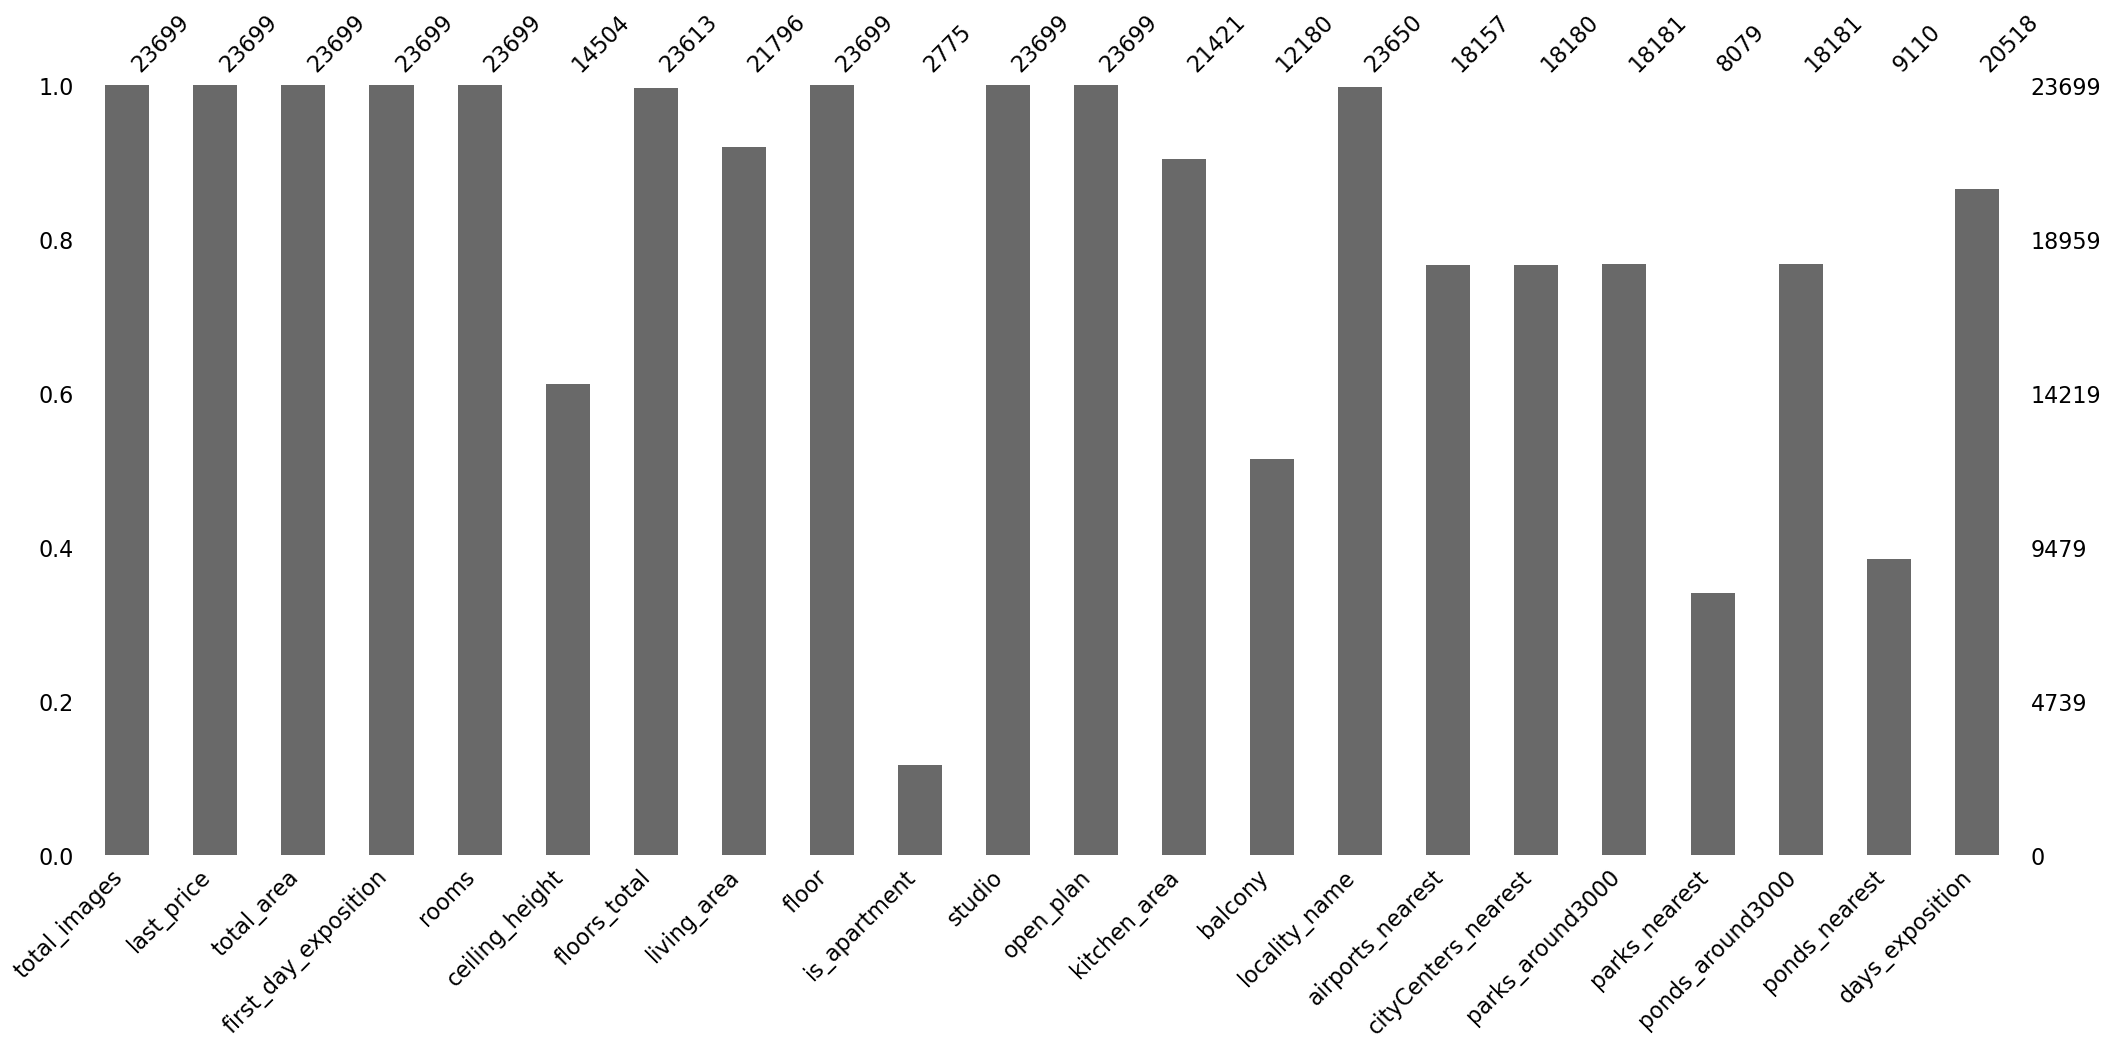

In [8]:
# визуализируем полученную ранее сводку по пропускам с помощью библиотеки missingno
msno.bar(data)
plt.show()

Как можно наблюдать, в ряде столбцов присутствуют пропуски. Особое внимание следует обратить на столцы `ceiling_height`, `is_apartment`, `balcony`, `parks_nearest` и `ponds_nearest`, т.к. в них пропуски составляют около 50% и выше.

Рассмотрим структуру пропусков подробнее. 

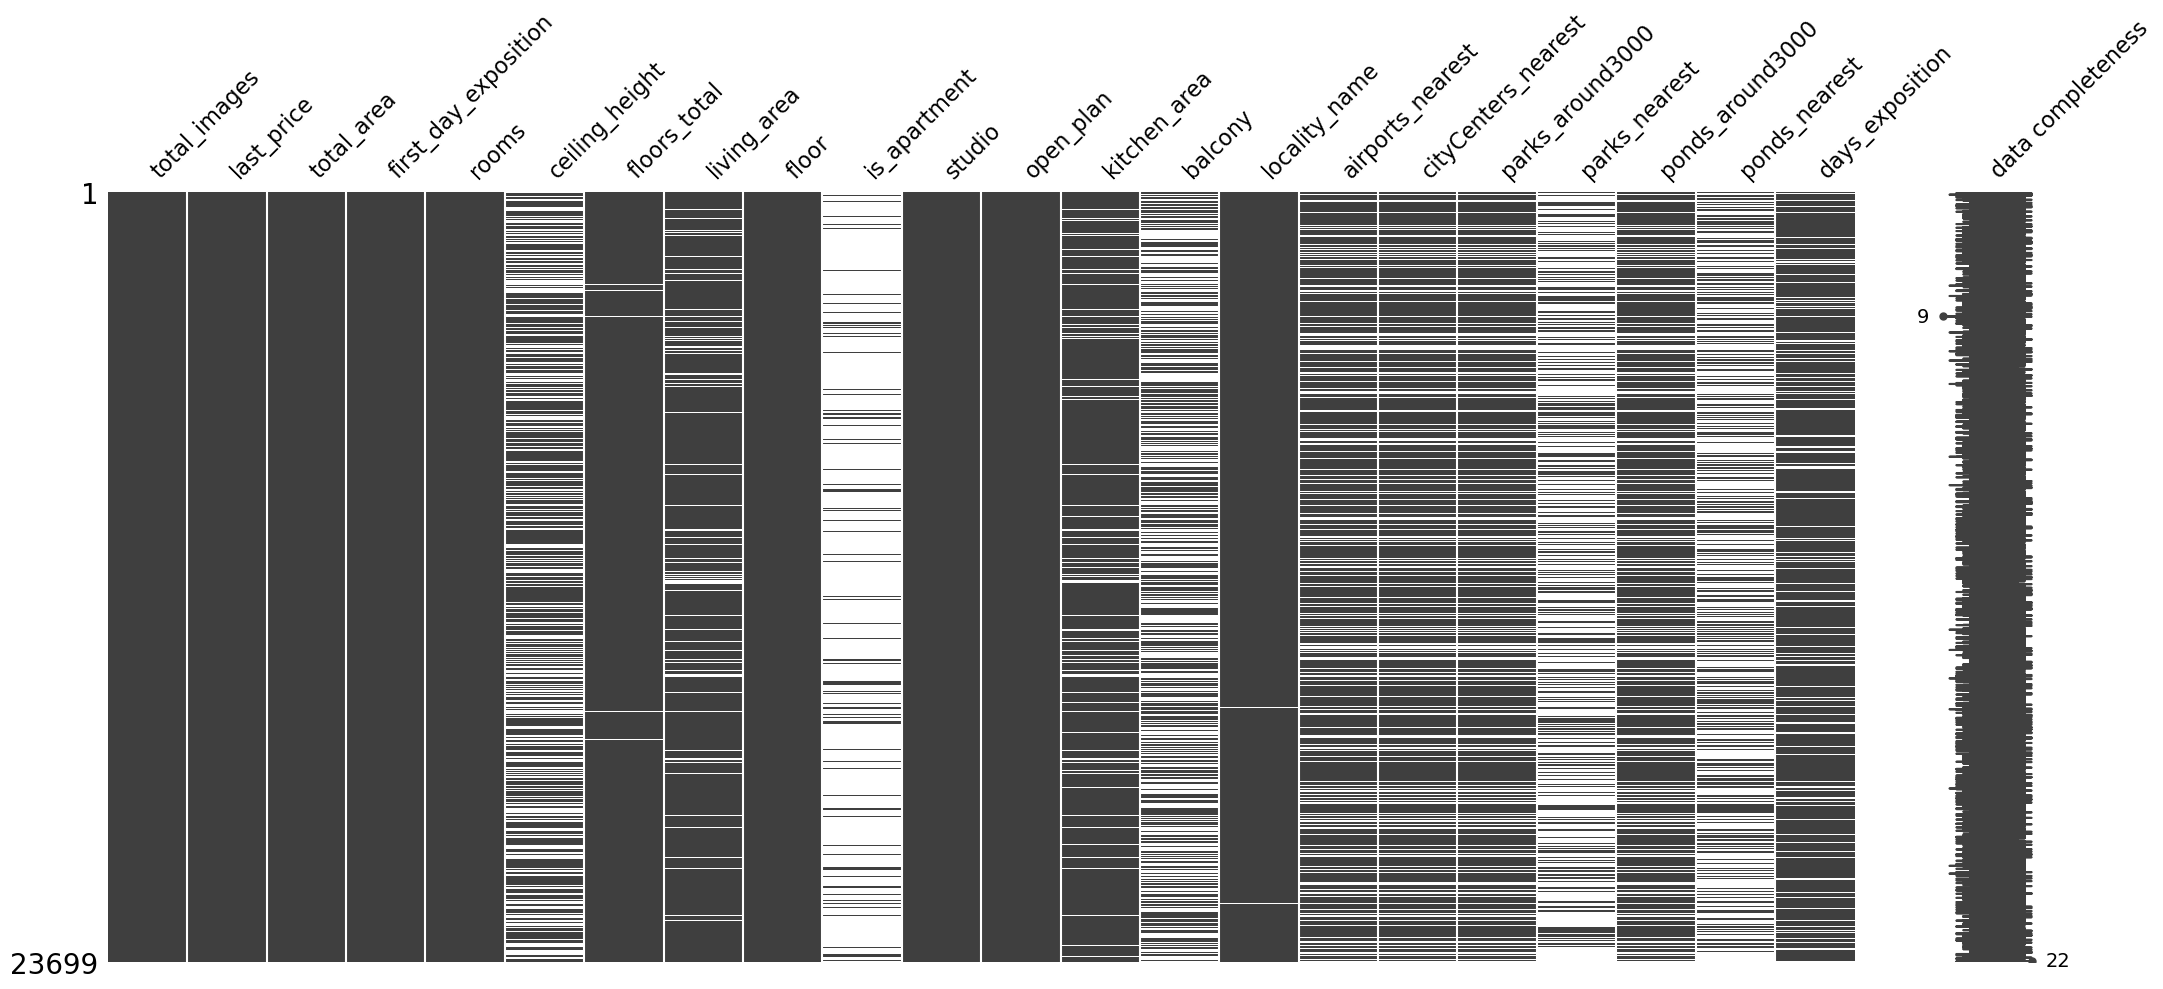

In [9]:
# визуализируем долю и место пропусков в датафрейме с помощью библиотеки missingno
msno.matrix(data, labels=True)
plt.show()

При ознакомлении со структурой пропусков в столбцах датафрейма мы можем наблюдать разные паттерны распределения лакун. Поскольку данные собраны смешанным способом (часть - пользователи, часть - геоданные сервиса), наблюдается характерная неоднородность у пользовательских данных (разная плотность пропусков у столбцов `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`), что контрастирует с однородностью пропусков в данных, заполненных сервисом (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`).

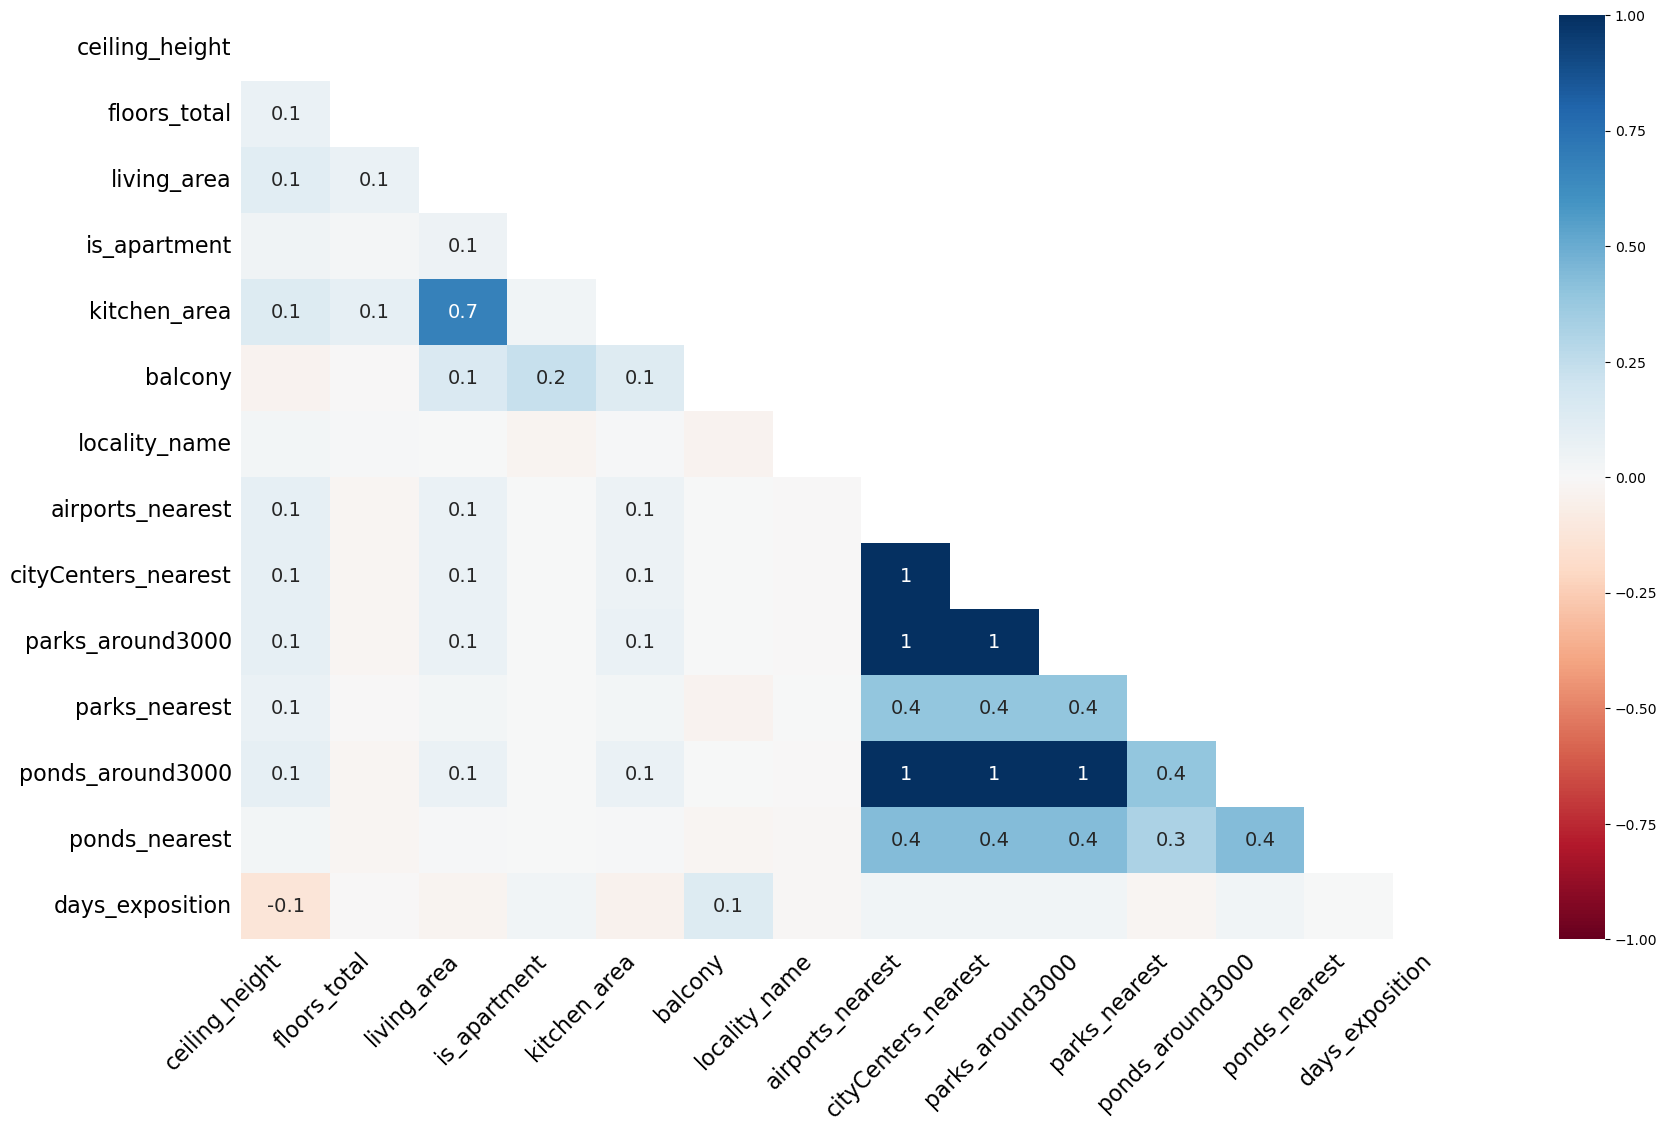

In [10]:
# выявим корреляцию пропусков
msno.heatmap(data)
plt.show()

Корреляционные показатели подтверждают смешанную природу данных. Мы наблюдаем умеренную (0.3 - 0,4) или максимальную положительную корреляцию между данными, заполняемыми сервисом автоматически. Что свидетельствует о некорректной работе сервиса при  определенном условии. Также наблюдается достаточно сильная корреляция между жилой площадью и площадью кухни, что свидетельствует в первую очередь о том, что если пользователь не указаывает параметры нежилой площади, то он не  указывает их полностью, ограничиваясь общей.

Рассмотрим каждый столбец и избавимся от пропусков там, где это возможно.

#### Столбец `ceiling_height`

In [11]:
# выведем уникальные значения для столбца "ceiling_height"
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Значения в этом столбце представлены высотой потолков. Здесь представлены как вполне вероятные значения, так и аномальные (например, 100). Скорее всего данные значения вызваны неверной единицей измерения. Создадим функцию, которая заменит аномальные значения, разделив высоту свыше 20 м на 10. Так, мы переведем высотность помещений к привычным значениям, а оставшиеся аномалии обработаем дополнительно вместе с пропусками.

In [12]:
# функция, котоая делит значение на 10, если оно превышает 20
def ceiling_normalisation(height):
    if height>20:
        height /= 10
    return height

# применим функцию ко всему столбцу
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_normalisation)
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Нормализовав часть аномальных значений, обратим внимание на оставшиеся. Как и прежде у нас остались пропуски, а также аномально низкие и высокие значения. Здесь важно учитывать региональную специфику недвижимости: в Санкт-Петербурге и Ленинградской области немало объектов недвижимости старого фонда, поэтому большая высотность в отношении данного региона вполне естетственна. Заменим значения вне диапазона 2—6м и пропуски медианой.

In [13]:
# выведем медиану для текущего столбца
ceiling_median = data['ceiling_height'].median()

# объявим функцию, которая будет обрабатывать аномальные значения
def ceiling_fill(height):
    if height < 2 or height > 6:
        height = ceiling_median
    return height

# применим функцию к столбцу
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_fill)

# заполним  пропуски медианой и выведем результат
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31,
       4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.

Теперь, когда значения столбца нормализованы, построим для него гистограмму, чтобы убедиться в нормальном распределении значений.

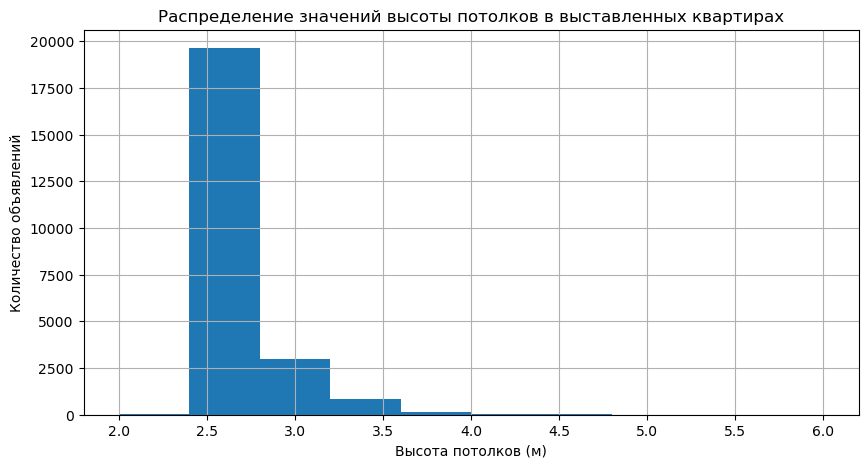

In [14]:
# строим гистограмму
data['ceiling_height'].plot(
    kind ='hist',
    figsize = (10,5),
    title = 'Распределение значений высоты потолков в выставленных квартирах',
    grid = True,
    xlabel = 'Высота потолков (м)',
    ylabel = 'Количество объявлений'
)
plt.show()

#### Столбец `floors_total`

Столбец `floors_total` также имеет пропуски, однако вряд ли будет хорошей решением вставить среднее или медианное значение. Убедимся в этом, выявив самые распространенные показатели этажности среди выставленных объектов недвижимости.

In [15]:
# рассмотрим частотность значений столбца "floors_total", принимая дату выставления объявления за единицу самого объявления
data.groupby('floors_total')['first_day_exposition'].count().sort_values(ascending=False)

floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
33.0       1
34.0       1
37.0       1
52.0       1
60.0       1
Name: first_day_exposition, dtype: int64

Как мы видим, этажность более независимый показатель, нежели высота помещений, поэтому оптимальным вариантом будет удалить пропуски. Более того, пропуски в данном столбце составляют менее 1% (86 пропусков на 23699 вхождений).

In [16]:
# удалим все прпоуски в столбце "floors_total" и проверим, остались ли пропуски
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isna().sum()

0

Также следует отметить, что столбец представляет значения типа `float`, хотя количество этажей имеет целочисленную природу. Переведем значения столбца к целочисленному типу `int`.

In [17]:
# переводим значения столбца "floors_total" к типу int и проверим результат, отобразив первые строки
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

#### Столбцы `living_area`, `is_apartment` и `kitchen_area`

Столбцы `living_area` и `is_apartment` взаимосвязаны, т.к. жилая площадь возможна только у квартир с юридическим статусом жилого помещения, в то время как апартмаенты не  могут иметь жилой площади. С этим зачастую и связано то, почему так много пропусков относительно апартмаентов: апартаменты более проблемный и нежилой объект недвижимости со всеми выходящими из этого факта экономическими и жилищными последствиями, хотя он так же может быть приобретен в собственность, как и квартира.

Рассмотрим данные столбцы подробнее.

In [18]:
# выводим уникальные значения и их количество для столбца "living_area"
data.groupby('living_area')['first_day_exposition'].count().sort_values(ascending=False).head()

living_area
18.0    882
17.0    674
30.0    598
16.0    484
20.0    481
Name: first_day_exposition, dtype: int64

In [19]:
# выводим уникальные значения для столбца "is_apartment"
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Учитывая, что пропусков в столбце `is_apartment` слишком много, чтобы их удалить или пропустить, примем за апартаменты те, которые не имеют значения в столбце `living_area`, а сам столбец `living_area` оставим с пропусками, т.к. для определения цены за кв.м. используется столбец `total_area`. 

In [20]:
# заполним пропуски значение True там, где не указана жилая площадь
data['is_apartment'] = data[data['living_area'].isna()]['living_area'].fillna(True)

# заполним оставшиеся пропуски False
data['is_apartment'] = data['is_apartment'].fillna(False)

# проверим пропуски в столбце "is_apartment"
data['is_apartment'].isna().sum()

0

Заполним пропуски в столбце `living_area` нулевым значением.

In [21]:
# заполним пропуски нулевым значением
data['living_area'] = data['living_area'].fillna(0)

# проверим пропуски в столбце "living_area"
data['living_area'].isna().sum()

0

Заполним пропуски в столбце `kitchen_area` нулевым значением.

In [22]:
# выявим текущее количество пропусков в столбце
data['kitchen_area'] = data['kitchen_area'].fillna(0)

# проверим пропуски в столбце "kitchen_area"
data['kitchen_area'].isna().sum()

0

#### Столбец `balcony`

Столбец `balcony` сложно восстановить. Более того, у столбца вещественные значения, хотя отражено именно число балконов, а не их площадь, поэтому тип данных следует изменить на `int`. Вероятнее всего пропуски свидетельствуют об отсутствии балкона у выставляемого объекта недвижимости. Заменим пропуски нулевым значением.

In [23]:
# выявим уникальные значения для столбца "balcony"
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [24]:
# заменим пропуски на нулевые значения
data['balcony'] = data['balcony'].fillna(0)

# переведем тип данных в int
data['balcony'] = data['balcony'].astype('int')

# выведем первые строки в столбце "balcony"
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

#### Столбец `locality_name`

Столбец `locality_name` представлен категориальными значениями. В данном случае важно учитывать не только пропуски, но неявные дубликаты. Для этого выведем количество пропусков и список уникальных значений.

In [25]:
# выведем количество пропусков
data['locality_name'].isna().sum()

48

48 вхождений не имеют информации о местонахождении объектов недвижимости. Данные пропуски можно удалить, т.к. они составляют около 0,2% от общей выборки и не нанесут критического урона целостности данных.

In [26]:
# удаляем пропуски
data = data.dropna(subset=['locality_name'])

# проверим количество пропусков
data['locality_name'].isna().sum()

0

In [27]:
# выведем уникальные значения в столбце
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
# выведем количество уникальных значений в столбце
data['locality_name'].nunique()

364

Как можно наблюдать, встречаются неявные дубликаты по использованию `е`-`ё`, а также по уточнению статуса населенного пункта `поселок`-`поселок городского типа`. Произведем замену топонимов на варианты без `ё` и без дополнительных уточнений статуса.

In [29]:
# заменим "ё" на "е", а также поселки разного типа на обобщающее "поселок"
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской посёлок', 'поселок городского типа', 'поселок станции', 'посёлок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
)

# выведем количество уникальных значений в столбце
data['locality_name'].nunique()

327

Количество уникальных значений сменилось с 364 на 327 (около 10% от изначального).

#### Столбцы `airports_nearest` — `ponds_nearest`

Столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` отражают расстояние и количество соответствующих объектов в пределах 3 км. Поскольку данные значения получены автоматически на основе картографических данных, пропуски имеют намеренный характер, а именно: пропущены значения только том случае, где объект расположен вне города или в области.

Однако столбцы `parks_around3000` и `ponds_around3000` отражают количество объектов, а тип данных — `float`. Изменим тип данных на `int`, предварительно скорректировав название столбца `cityCenters_nearest` и заполнив пропуски нулевыми значениями.

In [30]:
# изменим название столбца "cityCenters_nearest" на более подходящее для исследования
data.rename(
    columns = {'cityCenters_nearest': 'city_center_nearest'}, 
    inplace = True
)

# проверим изменения
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [31]:
# вынесем интересующие названия столбцов в отдельный итерируемый список
col_range = ['airports_nearest', 'city_center_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

# создадим цикл, который заполняет пропуски в каждом столбце списка
for col in col_range:
    data[col] = data[col].fillna(0)

# проверим работу цикла
data[['airports_nearest', 'city_center_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].isna().sum()

airports_nearest       0
city_center_nearest    0
parks_around3000       0
parks_nearest          0
ponds_around3000       0
ponds_nearest          0
dtype: int64

In [32]:
# изменим тип данных столбцов на int там, где значения не пропцщены
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce', downcast='integer')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors='coerce', downcast='integer')

# проверим полученный тип в столбцах
data[['parks_around3000', 'ponds_around3000']].head()

,parks_around3000,ponds_around3000
0,1,2
1,0,0
2,1,2
3,2,3
4,2,1


#### Столбец `days_exposition`

In [33]:
# ознакомимся со значениями в  столбце "days_exposition"
data['days_exposition'].head()

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

Столбец `days_exposition` показывает количество дней, прошедших со даты публикации до снятия объявления. Поскольку связанный столбец `first_day_exposition` не имеет пропусков (что свидетельствует о корректности работы сервиса), то можно предположить, что пропуски в `days_exposition` означают, что объявление до сих пор актуально. Тогда пропуски в данном столбце следует оставить, однако это повлияет на дальнейший анализ ценообразования и скорости продажи, поэтому по умолчанию всем актуальным объявлениям в пропуски назначим `0`, а при дальнейшем анализе исключим актуальные объявления из анлизируемого среза.

In [34]:
# заполним пропуски максимальным значением для столбца
data['days_exposition'] = data['days_exposition'].fillna(0)

# убедимся в заполнении пропусков
data['days_exposition'].isna().sum()

0

Тип данных столбца `days_exposition` — `float`, хотя имеется в виду полные дни (`int`). Скорректируем тип данных.

In [35]:
# изменим тип данных столбцов на int
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce', downcast='integer')

# проверим полученный тип в столбце
data['days_exposition'].head()

0      0
1     81
2    558
3    424
4    121
Name: days_exposition, dtype: int16

По завершении ознакомления с данными и первичной предобработки датафрейма можно произвести оценки актуального материала для анализа. Представленные данные содержат информацию об объектах недвижимости, выставленных на продажу в сервисе. Материал имеет смешанную природу: ключевая информация о помещениях вносится пользователями, а остальные данные дополняются автоматически на основе геолокационных данных сервиса. Среди проблем, выявленных в материале и препятствующих дальнейшему анализу рынка недвижимости, выделяются пропуски, неверные типы данных и некорректное наименование столбцов. Также дополнительная обработка потребовалась для значений с наименованием населенного пункта объектов для выявления и устранения неявных дубликатов.
Для устранения пропусков в целях сохранения данных потребовалось прибегнуть к значениям заглушкам (значение `0`), что объясняется разнородностью данных и многоаспектностью рынка недвижимости, ввиду чего наличие пропуска в одном парметре необязательно свидетельствует о пропуске в другом. Неверные типы данных для целочисленных параметров приведены к соответствующему типу `int`, а  название столбца `cityCenter_nearest` приведено к конвенциональному - `city_center_nearest`. Выявленные неявные дубликаты были приведены к единственному уникальному значению.

### Обогащение данных

Для дальнейшего анализа нам также потребуется обогатить датафрейм дополнительными столбцами:
- с ценой квадратного метра,
- с номером дня недели публикации объявления о продаже,
- с номером месяца публикацииобъявления о продаже,
- с годом объявления о продаже,
- с категорией этажа объекта (`первый`, `последний`, `другой`),
- с расстоянием объекта до центра в км.

#### Новый столбец `price_per_square`

In [36]:
# добавим столбец "price_per_square" для определения цены одного квадратного метра
data['price_per_square'] = data['last_price'] / data['total_area']

# округлим значения столбца до сотых
data['price_per_square'] = data['price_per_square'].round(2)

# выведем первые значения столбца
data['price_per_square'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_square, dtype: float64

#### Новые столбцы `exposition_day`, `exposition_month` и `exposition_year`
Чтобы добавить столбцы `exposition_day`, `exposition_month` и `exposition_year` потребуется работа со столбцом `first_day_exposition`. Для этого отформатируем исходный столбец для более удобной работы с типом `datetime`.

In [37]:
# отформатируем значения столбца "first_day_exposition" в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# удостоверимся в успешности форматирования столбца
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [38]:
# добавим новый столбец "exposition_day"
data['exposition_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

# добавим новый столбец "exposition_month"
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

# добавим новый столбец "exposition_year"
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

# проверим создание новых столбцов
data[['exposition_day', 'exposition_month', 'exposition_year']].head()

,exposition_day,exposition_month,exposition_year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018


#### Новый столбец `floor_category`
Для того, чтобы создать новый столбец с классификацией этажей квартир, потребуется создать функцию категоризации значений этажности зданий, а затем применить ее к новому столбцу `floor_category`.

In [39]:
# определим функцию для категоризации этажей
def floor_categorize(line):
    current_floor = line['floor']
    floor_number = line['floors_total']
    if current_floor == floor_number:
        return 'последний'
    elif current_floor == 1:
        return 'первый'
    else:
        return 'другой'
    
# создадим новый столбец и применим к нему функцию категоризации этажей
data['floor_category'] = data.apply(floor_categorize, axis=1)

# проверим значения нового слобца
data['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

#### Новый столбец `center_distance`
Чтобы добавить новый столбец `center_distance`, потребуется разделить значения исходного столбца на 1000 и округлить до целых.

In [40]:
# создадим столбец "center_distance"
data['center_distance'] = data['city_center_nearest'] / 1000

# окгруглим значения столбца до целых значений
data['center_distance'] = data['center_distance'].round(0)

# переведем тип столбца в int
data['center_distance'] = data['center_distance'].astype('int')

# выведем значения столбца
data['center_distance'].head()

0    16
1    19
2    14
3     7
4     8
Name: center_distance, dtype: int32

### Исследовательский анализ данных

#### Анализ параметров

На этапе EDA проведем анализ параметров располагаемых данных путем построения гистограмм с целью выявления редких и выбивающихся значений. Таким образом мы выявим аномалии и устраним их, а там, где возможно, восстановим значения. Для такой процедуры у нас подойдут следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

Построим гистограммы для избранных параметров, чтобы рассмотреть распределние значений и выявить дополнительную необходимость в обработке столбцов. Для выявления выбросов зададим большее количество корзин. Там, где потребуется, построим диаграмму размаха и выявим базовые статистические показатели, чтобы избавиться от выбросов.

##### Параметр `общая площадь`

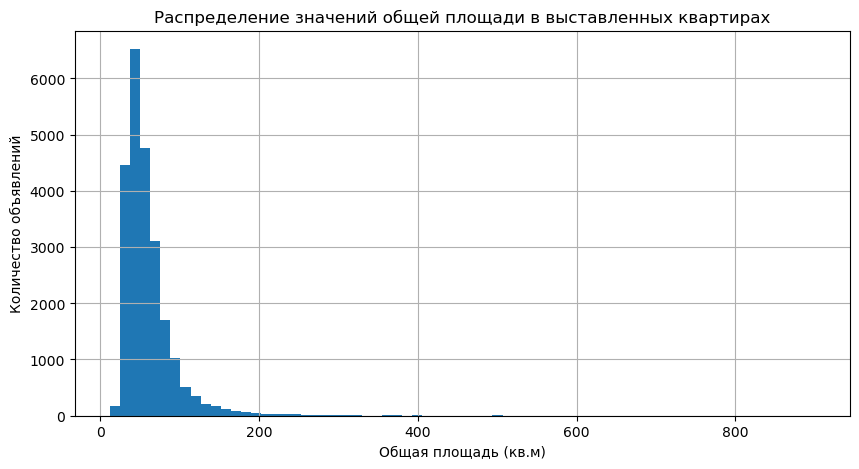

In [41]:
# построим гистограмму для столбца
data['total_area'].plot(
    kind ='hist',
    figsize = (10, 5),
    title = 'Распределение значений общей площади в выставленных квартирах',
    grid = True,
    xlabel = 'Общая площадь (кв.м)',
    bins = 70,
    ylabel = 'Количество объявлений'
)
plt.show()

Как мы можем наблюдать, параметр `общая площадь` демонстрирует нормальное распределение: большая часть объектов недвижимости варьируется по площади от 20 до 50 кв.м. Однако стоит отметить длинный спад после 150 кв.м., что может свидетельствовать о выбросах. Проверим опасения посредсвтом статичестического описания выборки.

In [42]:
# выведем статистическое описание столбцу
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

В подтверждение гистограммы выше в статистическом описании выделяется адекватный межквартильный размах, однако общий размах составляет 888 кв.м. Посмотрим на распределение значений в диаграмме размаха.

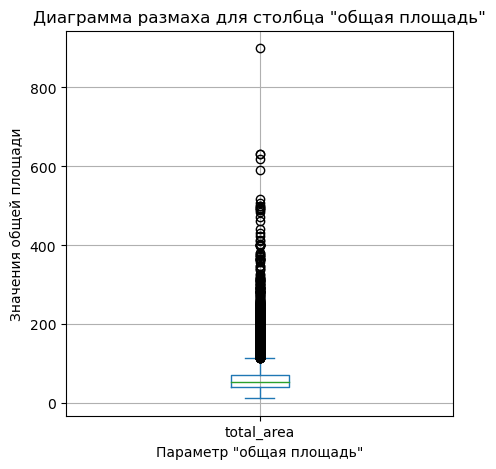

In [43]:
# построим диаграмму размаха для столбца
data['total_area'].plot(
    kind = 'box',
    figsize = (5, 5),
    title = 'Диаграмма размаха для столбца "общая площадь"',
    grid = True,
    xlabel = 'Параметр "общая площадь"',
    ylabel = 'Значения общей площади'
)
plt.show()

Мы наблюдаем высокую долю выбросов выше 4-ого квартиля, однако надо быть осторожным в удалении выбросов, т.к. специфика петербужской недвижимости (старый фонд, элитное жилье и прочее) могут демонстрировать такой разброс в метраже. Проверим предполагаемые выбросы по цене за кв.м. Предполагается, что цена за кв.м. как у современного жилья, так и у старого фонда будет отличаться в умеренных значениях.

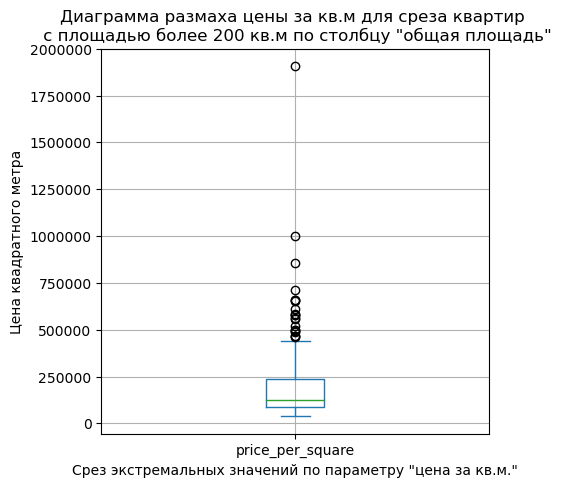

In [44]:
# создадим срез для объектов с высоким метражом
exceeding_area = data.query('total_area > 200')

# построим ящик с усами для среза
exceeding_area['price_per_square'].plot(
    kind = 'box',
    figsize = (5, 5),
    title = 'Диаграмма размаха цены за кв.м для среза квартир \n с площадью более 200 кв.м по столбцу "общая площадь"',
    grid = True,
    xlabel = 'Срез экстремальных значений по параметру "цена за кв.м."',
    ylabel = 'Цена квадратного метра'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

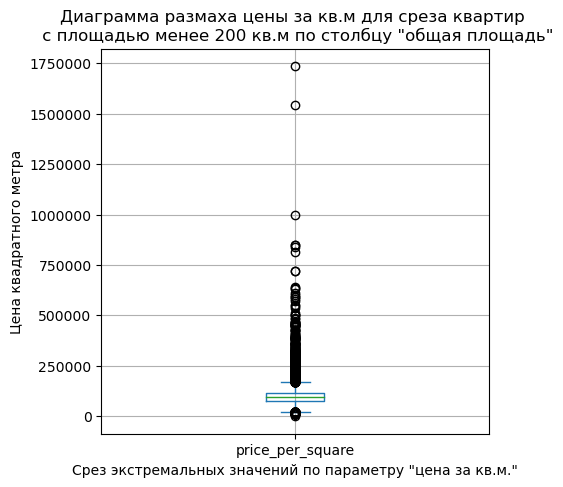

In [45]:
# создадим срез для объектов с типичным метражом
normal_area = data.query('total_area < 200')

# построим ящик с усами для среза
normal_area['price_per_square'].plot(
    kind ='box',
    figsize = (5,5),
    title = 'Диаграмма размаха цены за кв.м для среза квартир \n с площадью менее 200 кв.м по столбцу "общая площадь"',
    grid = True,
    xlabel = 'Срез экстремальных значений по параметру "цена за кв.м."',
    ylabel = 'Цена квадратного метра'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

Среди чрезвычайно больших площадей наблюдаются выбросы, как и у стандартных площадей. Учитывая такой размах, стоит удалить выбросы.

In [46]:
# проверим, каков процент предполагаемых выбросов
data[data['total_area'] > 200].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,exposition_day,exposition_month,exposition_year,floor_category,center_distance
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.0,3,False,...,508.0,3,366.0,62,302839.12,4,7,2017,последний,2
461,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,...,187.0,1,616.0,578,237499.11,3,6,2015,другой,7
489,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,False,...,138.0,3,620.0,14,439814.81,1,12,2017,другой,0
506,5,90000000.0,225.0,2016-06-26,6,2.65,4,134.0,2,False,...,0.0,2,519.0,416,400000.00,6,6,2016,другой,6
518,20,25717300.0,230.1,2015-01-21,3,2.65,3,130.0,1,False,...,676.0,3,278.0,1441,111765.75,2,1,2015,первый,29


Количество вхождений составляет 226 строк, что составляет около 1% от генеральной совокупности. Такой долей данных можно пожертвовать.

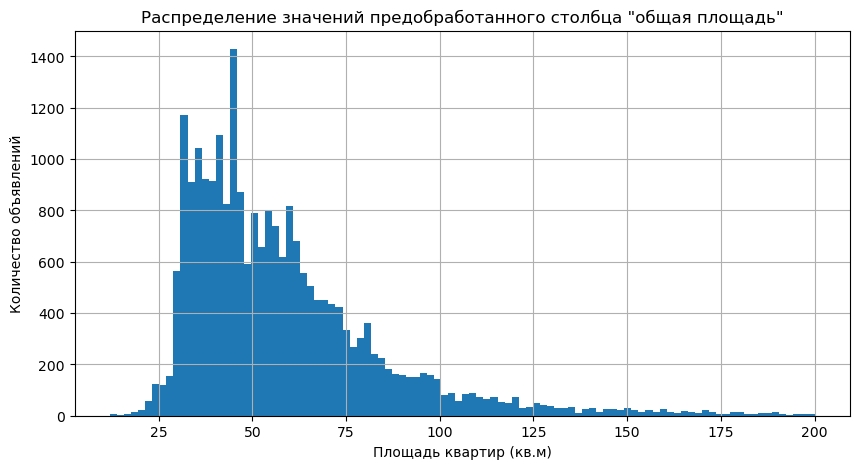

In [47]:
# удалим объекты, превышающие 200 кв.м.
data = data[data['total_area'] <= 200]

# построим гистограмму для обновленной выборки
data['total_area'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Распределение значений предобработанного столбца "общая площадь"',
    grid = True,
    xlabel = 'Площадь квартир (кв.м)',
    ylabel = 'Количество объявлений'
)
plt.show()

После удаления критически высоких значений в столбце `total_area` мы наблюдаем более закономерное распределение значений, по которому можно сразу выявить типичные студии в новостройках, типовые квартиры советской затройки и обширные квартиры старого фонда.

##### Параметр `жилая площадь`

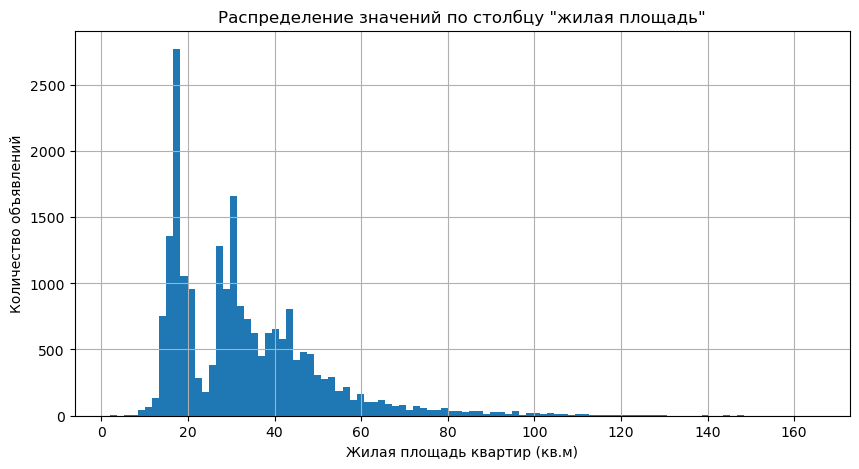

In [48]:
# построим гистограмму для столбца с отфильтрованными пропусками
data.query('living_area > 0')['living_area'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Распределение значений по столбцу "жилая площадь"',
    grid = True,
    xlabel = 'Жилая площадь квартир (кв.м)',
    ylabel = 'Количество объявлений'
)
plt.show()

Как мы видим выборка демонстрирует нормальное распределение. Наблюдаются 2 пика: 18 и 29 кв.м. Пропуски, заполненные нулевым значнеием, вынесены за пределы иллюстрируемого среза. Посмотрим статистическую сводку по выборке и диаграмму размаха.

In [49]:
# выведем статистическое описание столбцу
data['living_area'].describe()

count    23339.000000
mean        30.631141
std         18.922997
min          0.000000
25%         17.800000
50%         29.000000
75%         40.975000
max        164.700000
Name: living_area, dtype: float64

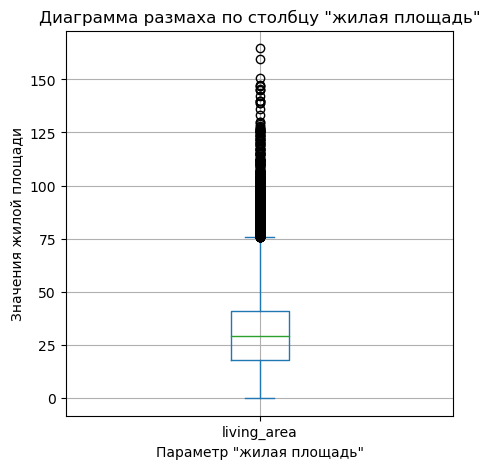

In [50]:
# построим диаграмму размаха для столбца
data['living_area'].plot(
    kind = 'box',
    figsize = (5, 5),
    title = 'Диаграмма размаха по столбцу "жилая площадь"',
    grid = True,
    xlabel = 'Параметр "жилая площадь"',
    ylabel = 'Значения жилой площади'
)
plt.show()

В целом, среднее арифметическое и медиана указывают на 29-30 кв.м., однако мы наблюдаем выбросы с 75 кв.м. Проверим, какая часть от датафрейма составлют выбросы.

In [51]:
# рассчитаем количесвто предполагаемых выбросов
total_living_area = data['living_area'].count()
living_area_anomalies = data[data['living_area'] > 75]['living_area'].count()
f'{living_area_anomalies} / {total_living_area} = {(living_area_anomalies/total_living_area)*100:.1f}'

'648 / 23339 = 2.8'

Выбросы составляют около 2,8% от генеральной совокупности. Такое количество можно удалить из датафрейма без потери репрезентативности.

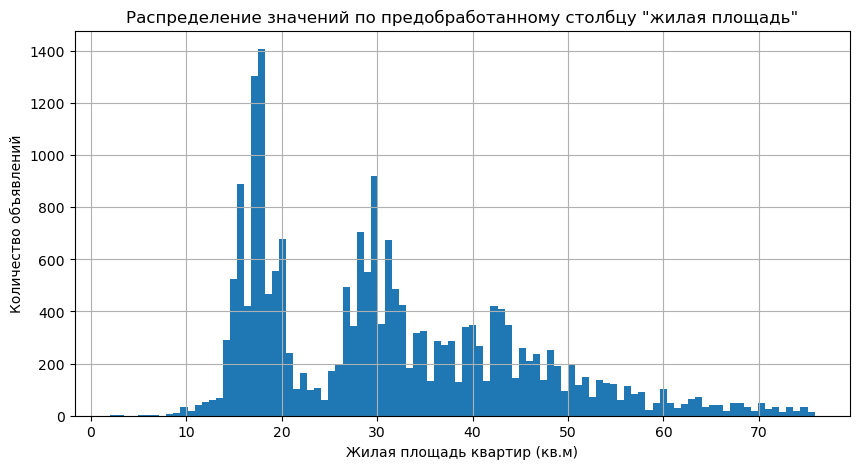

In [52]:
# удалим из датафрейма выбросы столбца "living_area"
data = data[data['living_area'] < 76]

# построим гистограмму для обновленной выборки
data.query('living_area > 0')['living_area'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Распределение значений по предобработанному столбцу "жилая площадь"',
    grid = True,
    xlabel = 'Жилая площадь квартир (кв.м)',
    ylabel = 'Количество объявлений'
)
plt.show()

##### Параметр `площадь кухни`

Столбец `kitchen_area` уже обрабатывался в пунктах выше. Проверим распределение, статистическое описание и размах выборки.

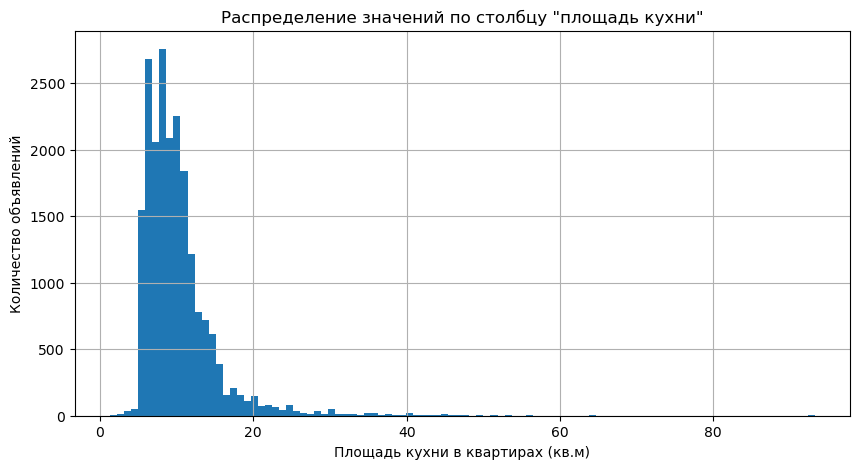

In [53]:
# построим гистограмму для столбца
data.query('kitchen_area > 0')['kitchen_area'].plot(
    kind = 'hist',
    figsize = (10, 5),
    bins = 100,
    title = 'Распределение значений по столбцу "площадь кухни"',
    grid = True,
    xlabel = 'Площадь кухни в квартирах (кв.м)',
    ylabel = 'Количество объявлений'
)
plt.show()

In [54]:
# выведем статистическое описание столбцу
data['kitchen_area'].describe()

count    22706.000000
mean         9.188976
std          5.688083
min          0.000000
25%          6.300000
50%          8.700000
75%         11.000000
max         93.200000
Name: kitchen_area, dtype: float64

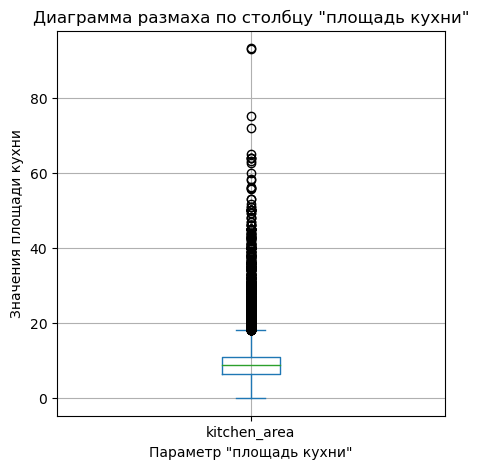

In [55]:
# построим диаграмму размаха для столбца
data['kitchen_area'].plot(
    kind ='box',
    figsize = (5,5),
    title = 'Диаграмма размаха по столбцу "площадь кухни"',
    grid = True,
    xlabel = 'Параметр "площадь кухни"',
    ylabel = 'Значения площади кухни'
)
plt.show()

Заметны частые выбросы сверх размаха, при условии что среднее и медиана сходятся в значения (8-9 кв.м.). Посчитаем количество предполагаемых выбросов и выведем их процент от генеральной совокупности.

In [56]:
# рассчитаем количесвто предполагаемых выбросов
total_kitchen_area = data['kitchen_area'].count()
kitchen_area_anomalies = data[data['kitchen_area'] > 20]['kitchen_area'].count()
f'{kitchen_area_anomalies} / {total_kitchen_area} = {(kitchen_area_anomalies/total_kitchen_area)*100:.1f}'

'727 / 22706 = 3.2'

Выбросы составляют около 3,2% от генеральной совокупности. Такое количество можно удалить из датафрейма без потери репрезентативности.

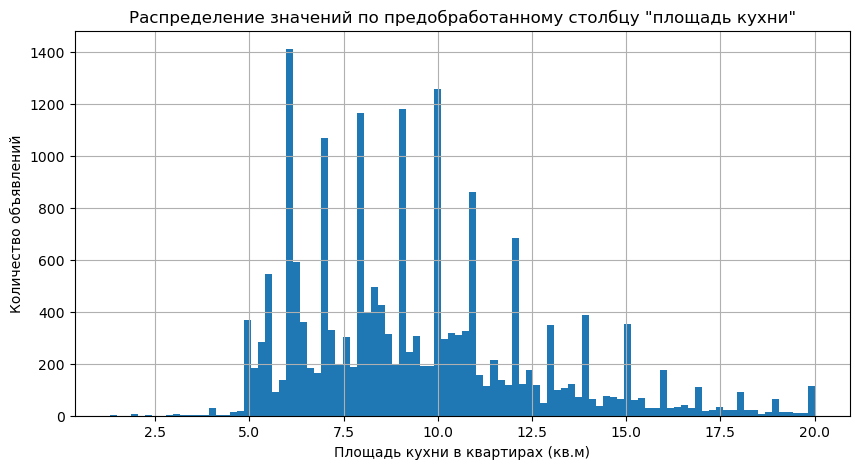

In [57]:
# удалим из датафрейма выбросы столбца "living_area"
data = data[data['kitchen_area'] <= 20]

# построим гистограмму для обновленной выборки
data.query('kitchen_area > 0')['kitchen_area'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Распределение значений по предобработанному столбцу "площадь кухни"',
    grid = True,
    xlabel = 'Площадь кухни в квартирах (кв.м)',
    ylabel = 'Количество объявлений'
)
plt.show()

##### Параметр `цена объекта`

Параметр `цена объекта` имеет ключевой значение для дальнейшего исследования, а также крайне относителен, т.к. зависит от метража и других параметров. Рассмотрим гистограмму, статистическую сводку и размах по столбцу.

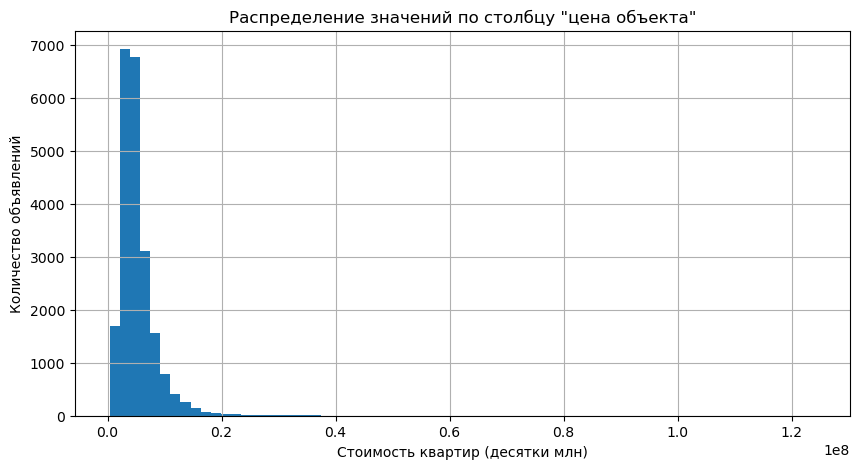

In [58]:
# построим гистограмму для столбца
data['last_price'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=70,
    title = 'Распределение значений по столбцу "цена объекта"',
    grid = True,
    xlabel = 'Стоимость квартир (десятки млн)',
    ylabel = 'Количество объявлений'
)
plt.show()

In [59]:
# выведем статистическое описание столбцу
data['last_price'].describe()

count    2.197900e+04
mean     5.308492e+06
std      3.796392e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.500000e+06
75%      6.200000e+06
max      1.240000e+08
Name: last_price, dtype: float64

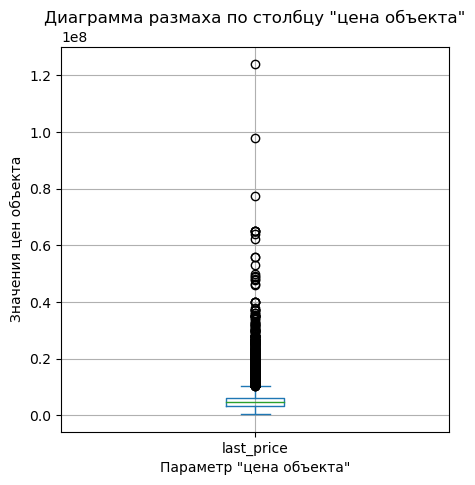

In [60]:
# построим диаграмму размаха для столбца
data['last_price'].plot(
    kind ='box',
    figsize = (5,5),
    title = 'Диаграмма размаха по столбцу "цена объекта"',
    grid = True,
    xlabel = 'Параметр "цена объекта"',
    ylabel = 'Значения цен объекта'
)
plt.show()

Как мы видим, значения по столбцу выдают колоколообразное распределение с длинным тонким хвостом. Там располагаются редкие предполагаемые выбросы, которые наглядно представлены на диаграмме размаха. Посчитаем их количество и процент от общей выборки.

In [61]:
# рассчитаем количесвто предполагаемых выбросов
total_last_price = data['last_price'].count()
last_price_anomalies = data[data['last_price'] > 10.000000e+06]['last_price'].count()
f'{last_price_anomalies} / {total_last_price} = {(last_price_anomalies/total_last_price)*100:.1f}'

'1489 / 21979 = 6.8'

Выбросы составляют почти 7% от выборки, что достаточно много и может повлиять на репрезентативность данных. Повысим планку до 20 млн.

In [62]:
# рассчитаем количесвто предполагаемых выбросов выше 20 млн
total_last_price = data['last_price'].count()
last_price_anomalies = data[data['last_price'] > 20.000000e+06]['last_price'].count()
f'{last_price_anomalies} / {total_last_price} = {(last_price_anomalies/total_last_price)*100:.1f}'

'188 / 21979 = 0.9'

С таким парогом выбросы составляют меньше 1%, что вполне можно удалить. Учитывая относительность цены оставим выбросы в диапазоне 10-20 млн, поскольку размах и структурное описание выборки искажается диспропорцией современного жилья и старого фонда или элитного жилья. Остальные выбросы достаточно сильно выбиваются и требуеют отдельного исследования уже в условиях элитной недвижимости, а в данном исследовании они впоследствии могут сильно повлиять на дальнейшие выводы.

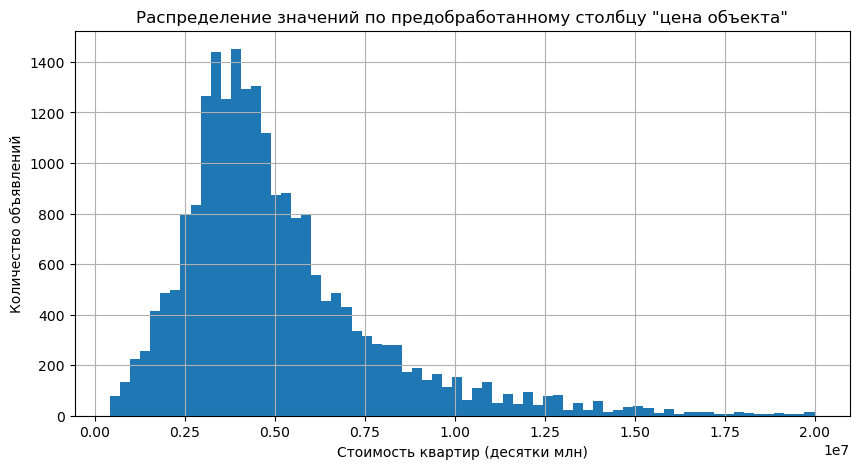

In [63]:
# удалим из датафрейма выбросы столбца "last_price"
data = data[data['last_price'] <= 20.000000e+06]

# построим гистограмму для обновленной выборки
data['last_price'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=70,
    title = 'Распределение значений по предобработанному столбцу "цена объекта"',
    grid = True,
    xlabel = 'Стоимость квартир (десятки млн)',
    ylabel = 'Количество объявлений'
)
plt.show()

##### Параметр `количество комнат`

Рассмотрим по тому же алгоритму параметр `количество комнат` (столбец `rooms`).

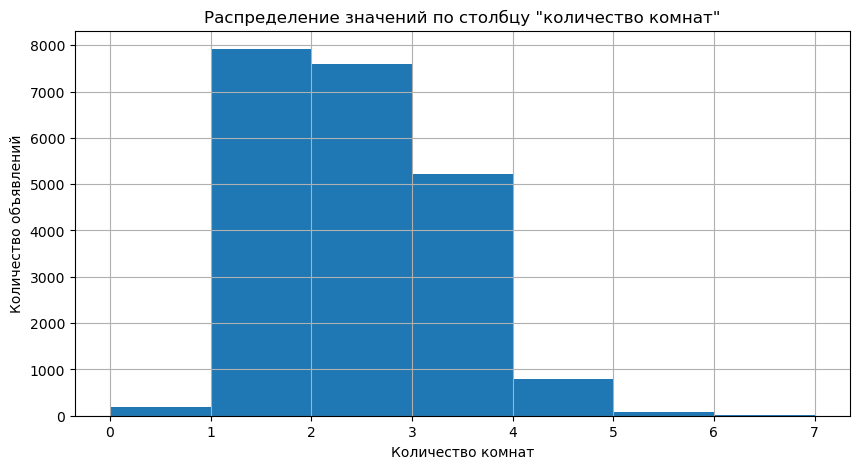

In [64]:
# построим гистограмму для столбца
data['rooms'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=7,
    title = 'Распределение значений по столбцу "количество комнат"',
    grid = True,
    xlabel = 'Количество комнат',
    ylabel = 'Количество объявлений'
)
plt.show()

In [65]:
# выведем статистическое описание столбцу
data['rooms'].describe()

count    21791.000000
mean         1.943784
std          0.906358
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

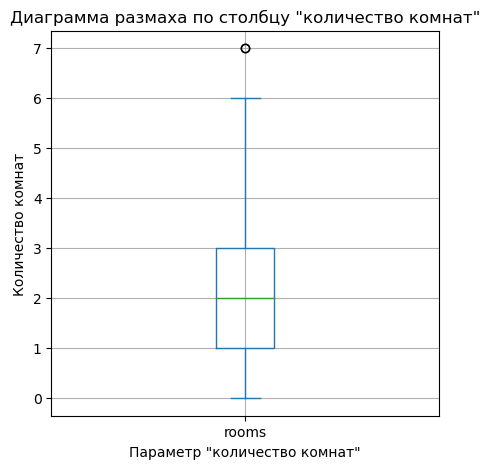

In [66]:
# построим диаграмму размаха для столбца
data['rooms'].plot(
    kind ='box',
    figsize = (5,5),
    title = 'Диаграмма размаха по столбцу "количество комнат"',
    grid = True,
    xlabel = 'Параметр "количество комнат"',
    ylabel = 'Количество комнат'
)
plt.show()

Как мы видим, выборка по столбцу `rooms` демонстрирует наредкость структурированое распределение за исключением мнимого выброса в 7 комнат. Однако данное количество комнат для рынка недвижимости Санкт-Петербурга не является редкостью и выдается диаграммой размаха в качестве выброса из-за однородности основной доли показателей, а именно: квартиры с 1-3 комнатами. По этой причине дополнительной обработки в данном столбце не требуется.

##### Параметр `высота потолков`

Параметр `высота потолков` уже рассматривался в пункте выше, где были выявлены пропуски и аномалии. Предоставим статистическую картину по данному столбцу.

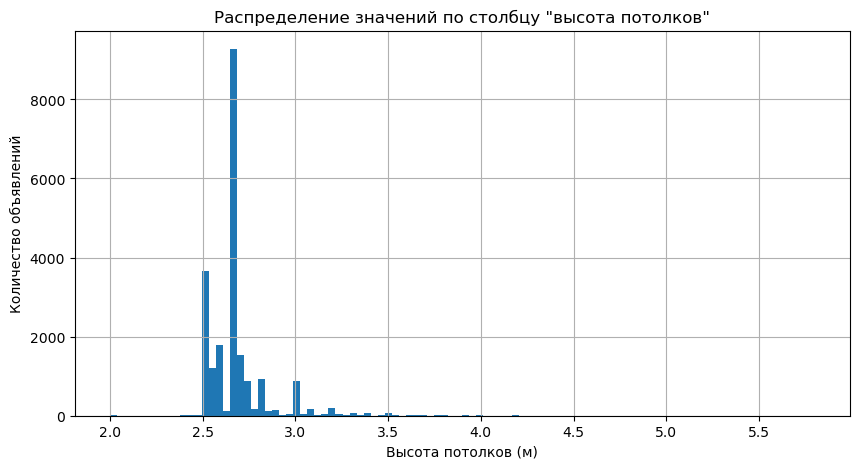

In [67]:
# построим гистограмму для столбца
data['ceiling_height'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Распределение значений по столбцу "высота потолков"',
    grid = True,
    xlabel = 'Высота потолков (м)',
    ylabel = 'Количество объявлений'
)
plt.show()

In [68]:
# выведем статистическое описание столбцу
data['ceiling_height'].describe()

count    21791.000000
mean         2.675904
std          0.186161
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

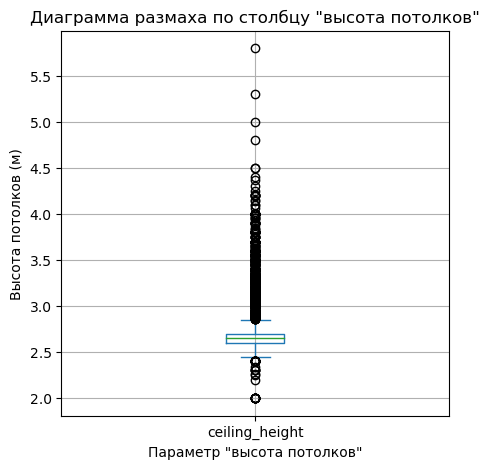

In [69]:
# построим диаграмму размаха для столбца
data['ceiling_height'].plot(
    kind ='box',
    figsize = (5,5),
    title = 'Диаграмма размаха по столбцу "высота потолков"',
    grid = True,
    xlabel = 'Параметр "высота потолков"',
    ylabel = 'Высота потолков (м)'
)
plt.show()

Мы можем наблюдать достаточно большое количество выбросов как до размаха, так и после. Посчитаем, каков процент от общей выборки составляют предполагаемые выбросы.

In [70]:
# рассчитаем количесвто предполагаемых выбросов
total_ceiling_height = data['ceiling_height'].count()
ceiling_height_anomalies = data[(data['ceiling_height'] > 2.9) | (data['ceiling_height'] < 2.3)]['ceiling_height'].count()
f'{ceiling_height_anomalies} / {total_ceiling_height} = {(ceiling_height_anomalies/total_ceiling_height)*100:.1f}'

'1900 / 21791 = 8.7'

Выбросы составляют 8,7% от выборки, что достаточно много и может повлиять на репрезентативность данных. Расширим диапазон допустимых значений до 2,2-3 м.

In [71]:
# рассчитаем количесвто предполагаемых выбросов ниже 2,2 и выше 3 м
total_ceiling_height = data['ceiling_height'].count()
ceiling_height_anomalies = data[(data['ceiling_height'] > 3) | (data['ceiling_height'] < 2.2)]['ceiling_height'].count()
f'{ceiling_height_anomalies} / {total_ceiling_height} = {(ceiling_height_anomalies/total_ceiling_height)*100:.1f}'

'962 / 21791 = 4.4'

Процент выбросов стал меньше - 4,4%, что достаточно много для выборки, однако допустимо удалить. Удалим выявленные выбросы.

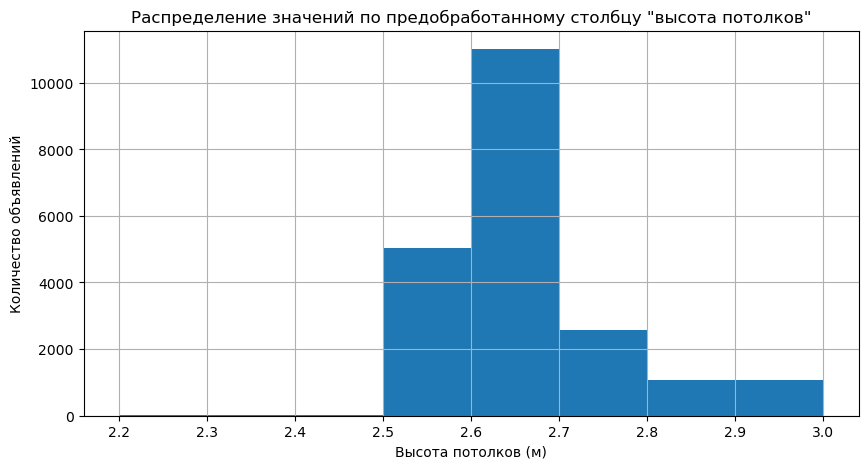

In [72]:
# удалим из датафрейма выбросы столбца "ceiling_height"
data = data[(data['ceiling_height'] <= 3) & (data['ceiling_height'] >= 2.2)]

# построим гистограмму для обновленной выборки
data['ceiling_height'].plot(
    kind ='hist',
    figsize = (10, 5),
    bins = 8,
    title = 'Распределение значений по предобработанному столбцу "высота потолков"',
    grid = True,
    xlabel = 'Высота потолков (м)',
    ylabel = 'Количество объявлений'
)
plt.show()

##### Параметр `тип этажа квартиры`

Рассматорим распределение параметра `тип этажа квартиры` (столбец `floor_category`).

In [73]:
# определим функцию для перевода категории этажа в число
def floor_category_to_number(textual_category):
    if textual_category == 'первый':
        return 1
    elif textual_category == 'последний':
        return 3
    else:
        return 2

# создадим новый столбце датафрейма с числом категории этажа
data['floor_category_number'] = data['floor_category'].apply(floor_category_to_number)

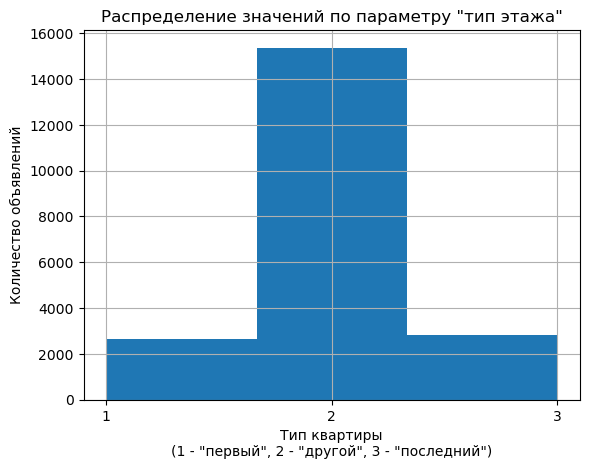

In [74]:
# построим гистограмму для столбца
data['floor_category_number'].plot(
    kind = 'hist',
    bins = 3,
    grid = True,
    title = 'Распределение значений по параметру "тип этажа"',
    xlabel = 'Тип квартиры\n(1 - "первый", 2 - "другой", 3 - "последний")',
    ylabel = 'Количество объявлений',
    xticks = [1, 2, 3],
)
plt.show()

Распределение типов этажей колоколообразное и полностью соответствует нормальному распределению. Данный столбец не требует дополнительной обработки.

##### Параметр `общее количество этажей в доме`

Рассмотрим распределение параметра `общее количество этажей в доме` (столбец `floors_total`).

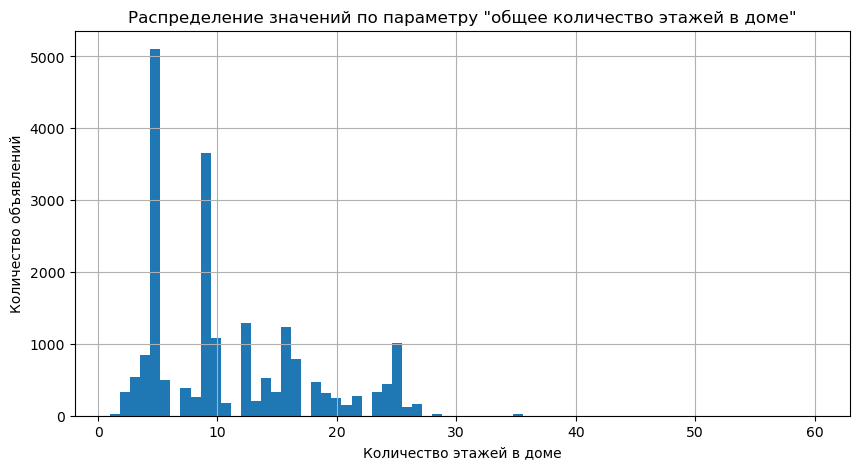

In [75]:
# построим гистограмму для столбца
data['floors_total'].plot(
    kind = 'hist',
    figsize = (10, 5),
    bins = 70,
    title = 'Распределение значений по параметру "общее количество этажей в доме"',
    grid = True,
    xlabel = 'Количество этажей в доме',
    ylabel = 'Количество объявлений'
)
plt.show()

Мы наблюдаем два отчетливых пика - дома с 6 и 10 этажами. Этажи с большей или меньшей высотностью представлены реже, что объясняется менее распространенной застройкой с другой этажностью. Можно сделать вывод о том, что в данных много зданий типовой застройки. В данной выборке аномалий не наблюдается.

##### Параметр `расстояние до центра города в метрах`

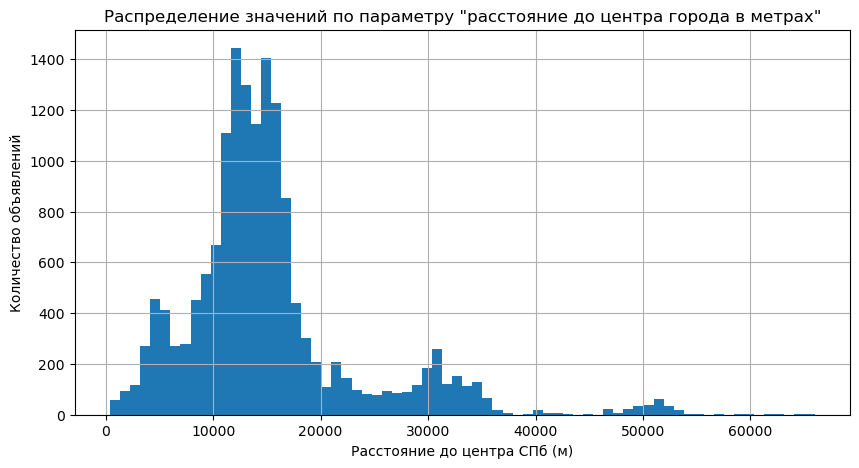

In [76]:
# построим гистограмму для столбца
data.query('city_center_nearest > 0')['city_center_nearest'].plot(
    kind = 'hist',
    figsize = (10, 5),
    bins = 70,
    title = 'Распределение значений по параметру "расстояние до центра города в метрах"',
    grid = True,
    xlabel = 'Расстояние до центра СПб (м)',
    ylabel = 'Количество объявлений'
)
plt.show()

Параметр `расстояние до центра города в метрах` рассматривался в пунктах выше. Данный столбец формировался автоматически на основе местоположения объекта. По этой причине мы убрали из среза выбивающиеся значения `0`, котоые присутствует у объектов Ленинградской области. Данные пропуски нельзя удалить из-за своей доли, однако оставшиеся значения демонстрируют нормальное распределение.

##### Параметр `расстояние до ближайшего парка`

Схожая ситуация наблюдается у столбца `parks_nearest`.

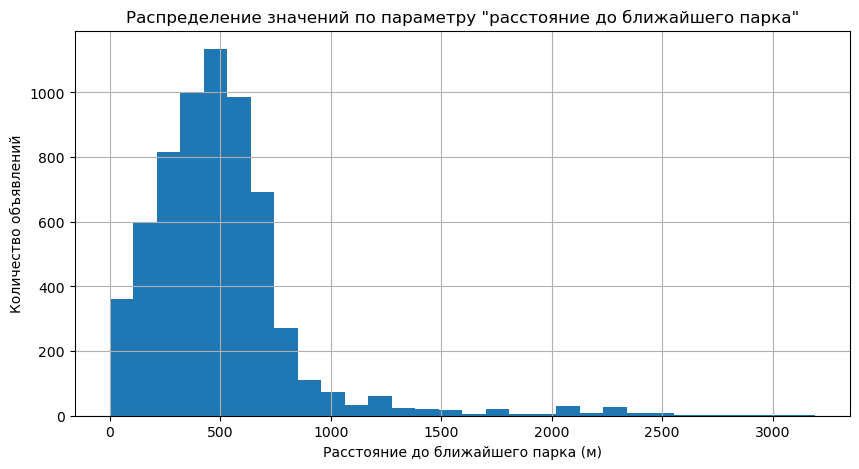

In [77]:
# построим гистограмму для столбца
data.query('parks_nearest > 0')['parks_nearest'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=30,
    title = 'Распределение значений по параметру "расстояние до ближайшего парка"',
    grid = True,
    xlabel = 'Расстояние до ближайшего парка (м)',
    ylabel = 'Количество объявлений'
)
plt.show()

За исключением пропусков, выведенных из иллюстрируемомго среза, наблюдается нормальное распределение. Удаление нулевых значений невозможно в связи с высокой долей рассматриваемого сегмента данных от общей выборки.

#### Анализ динамики продаж

После удаления аномалий и приведения данных в норму приступим к анализу динамики продаж. Для этого посмотрим, сколько дней объявление о продаже было актуально, построим гистограмму столбца `days_exposition` и выявим среднее и медиану. Так мы сможем понять, какие продажи быстрые, а какие нестандратно долгие.

Чтобы понять, как быстро продовались квартиры, необходимо по столбцу `days_exposition` вычислить среденне и медиану, а затем на основе стандартного срока продажи рассмотреть слишком быстрые и слишком долгие продажи.

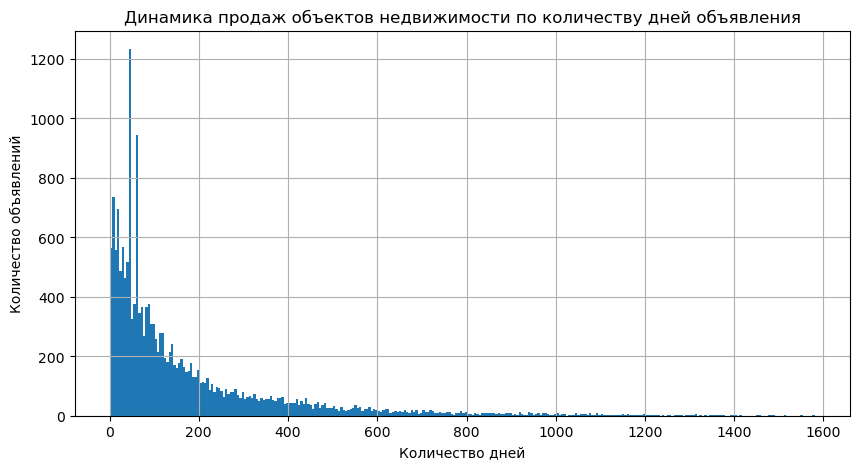

In [78]:
# построим гистграмму для столбца "days_exposition"
data.query('days_exposition > 0')['days_exposition'].plot(
    kind = 'hist',
    figsize = (10, 5),
    bins = 300,
    title = 'Динамика продаж объектов недвижимости по количеству дней объявления',
    grid = True,
    xlabel = 'Количество дней',
    ylabel = 'Количество объявлений'
)

plt.show()

Подкрепим гистограмму средним арифметическим и медианой.

In [79]:
# выявим среднее арифметическое и медиану для столбца "days_exposition"
'Среднее арифметическое: {mean:.1f}  Медиана: {median:.1f}'.format(mean=data['days_exposition'].mean(), median=data['days_exposition'].median())

'Среднее арифметическое: 150.4  Медиана: 71.0'

In [80]:
# выявим размах для столбца "days_exposition"
data['days_exposition'].describe()

count    20829.000000
mean       150.393826
std        204.556456
min          0.000000
25%         24.000000
50%         71.000000
75%        189.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как можно наблюдать, выборка выстраивается в распределение Пуассона. В диапазоне от 1 до 100 дн. мы наблюдаем 2 пика. Рассмотрим их подробнее.

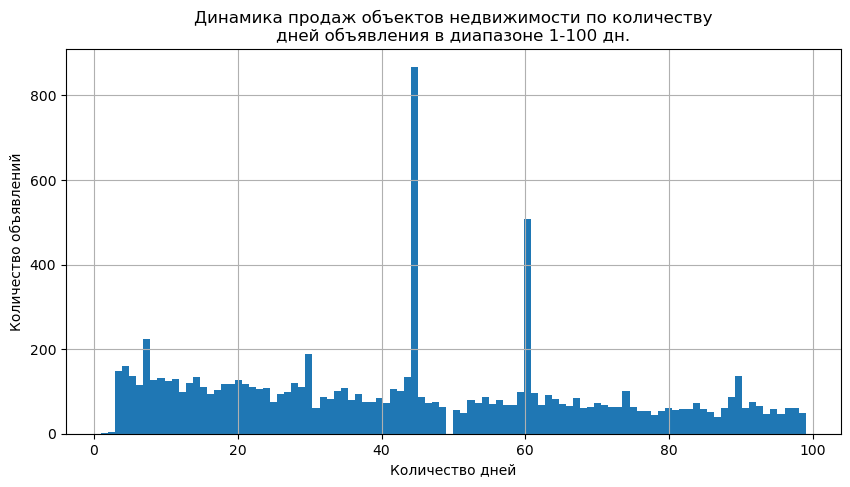

In [81]:
# построим гистграмму для столбца "days_exposition" в диапазоне от 1 до 100
data.query('0 < days_exposition < 100')['days_exposition'].plot(
    kind ='hist',
    figsize = (10,5),
    bins=100,
    title = 'Динамика продаж объектов недвижимости по количеству\nдней объявления в диапазоне 1-100 дн.',
    grid = True,
    xlabel = 'Количество дней',
    ylabel = 'Количество объявлений'
)
plt.show()

Отмеченные всплески приходятся на 45-й и 60-й дни. Число объявлений для данных дней превышает стандартные значения в несколько раз, что требует дополнительного исследования. Рассмотрим объявления для 45-ого и 60-ого дня внимательнее, а также возьмем данные из 53-ого дня для сравнения с типичным для временного ряда значениями.

In [82]:
# сохраним объявления по избранным дням
suspicious_day45 = data.query('days_exposition == 45')
suspicious_day60 = data.query('days_exposition == 60')
normal_day53 = data.query('days_exposition == 53')

# подготовим датафреймы со статистическим описанием для каждого дня
df45 = suspicious_day45.describe().T
df60 = suspicious_day60.describe().T
df53 = normal_day53.describe().T

In [83]:
# объявим функцию для автоматического переименования столбцов статистического описания
def column_renamer(df):
    name = str(df.loc['days_exposition', 'min'])
    df = df.rename(columns={
        'count':f'count_{name}', 
        'mean':f'mean_{name}', 
        'min':f'min_{name}',
        '25%':f'25%_{name}',
        '50%':f'50%_{name}',
        '75%':f'75%_{name}',
        'max':f'max_{name}',
        'std':f'std_{name}'}
        )
    return df

# переименуем каждый датафрейм
df45 = column_renamer(df45)
df60 = column_renamer(df60)
df53 = column_renamer(df53)

In [84]:
# объединим полученные датафреймы в один и выведем отдельно медианы каждого дня
days_to_compare = df45.join([df60, df53], how='left')
days_to_compare[['50%_45.0', '50%_60.0', '50%_53.0']]

,50%_45.0,50%_60.0,50%_53.0
total_images,7.0,9.0,8.0
last_price,3250000.0,5700000.0,4575000.0
total_area,43.0,58.0,51.0
first_day_exposition,2018-02-07 00:00:00,2018-02-01 00:00:00,2017-12-13 00:00:00
rooms,1.0,2.0,2.0
ceiling_height,2.65,2.65,2.65
floors_total,9.0,12.0,9.0
living_area,16.98,20.1,30.0
floor,4.0,6.0,5.0
kitchen_area,6.0,8.0,8.7


Учитывая медианные показатели каждого столбца по интересующим нас дням, мы не видим принципиальных отличий первых двух столбцов от третьего, однако можно отметить следующее: отличия 45-ого и 60-ого дня от 53-его заключается в году выставления объявлений, что могло привести к благоприятнму периоду на рынке недвижимости, особенно если учитывать жилую площадь, которая сильно отличается от общей, что не прослеживается у 53-его дня.
В качестве дополнительной гипотезы такого всплеска можно предположить алгоритмы сервиса или возможно действующие правила бизнес-модели, которые взымают плату за 45 и 60 день, на что указывает разница чисел в 1/4 от большего.

##### Промежуточный вывод
Среднее скорее всего искажено подозрительными значениями в хвосте распределения, поэтому медиана, наиболее устойчивая к выбросам, больше подходит для ориентира стандартной длительности продажи квартиры.
На основе полученного описания выборки по столбцу `days_exposition` мы можем судить о длительности продажи квартиры и, что важнее, об адекватности ее рыночной цены. Так, половина вхождений распрадается в пределеах 114 дней, т.е. стандартный срок продажи квартиры составляет срок в диапазоне 100-150 дней. Если квартира была продана менее чем за 45 дней, то это можно отметить как очень быструю продажу квартиры. Если же квартира продалась свыше 150 дней, то она продавалась очень долго.

#### Факторы стоимости объекта недвижимости

Дополнительно рассмотрим, какие факторы влияют на стоимость объекта. Для этого проверим взаимосвязь стоимости объекта от следующих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа, на котором расположена квартира;
- дата размещения (день недели, месяц, год).
    
Для того, чтобы выявить факторы, влияющие на на стоимость объекта, для начала создадим сводные таблицы по интересующим показателям, затем выведем диаграммы рассеивания (или аналоги при необходимости),  а также дополним визуализацию корреляцией. 

##### Фактор общей площади

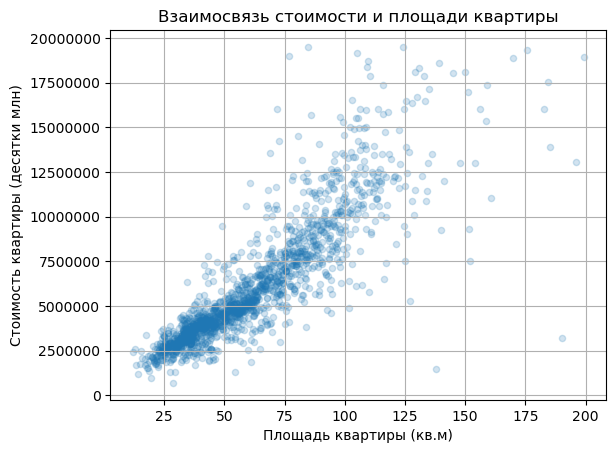

In [85]:
# создадим сводную таблицу по стоимости и общей площади квартиры
total_area_pivot = data.pivot_table(index='total_area', values=['last_price'], aggfunc='mean')
total_area_pivot = total_area_pivot.reset_index(drop=False)

# создадим диаграмму рассеивания к таблице
total_area_pivot.plot(
    x = 'total_area', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.2,
    title = 'Взаимосвязь стоимости и площади квартиры',
    grid = True,
    xlabel = 'Площадь квартиры (кв.м)',
    ylabel = 'Стоимость квартиры (десятки млн)'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

In [86]:
# дополним диаграмму корреляцией
round(total_area_pivot['total_area'].corr(total_area_pivot['last_price']), 2)

0.87

Корреляция общей площади и стоимости квартиры составляет около 0,87, что свидетельствет о достаточно сильной прямой корреляции между показателями и что подтверждается диаграммой рассеивания. Взаимосвязь данных показателей ослабевает при высоких значения (правый верхний угол диаграммы), что объясняется дополнительными факторами на рынке недвижимости Санкт-Петербурга.

##### Фактор жилой площади

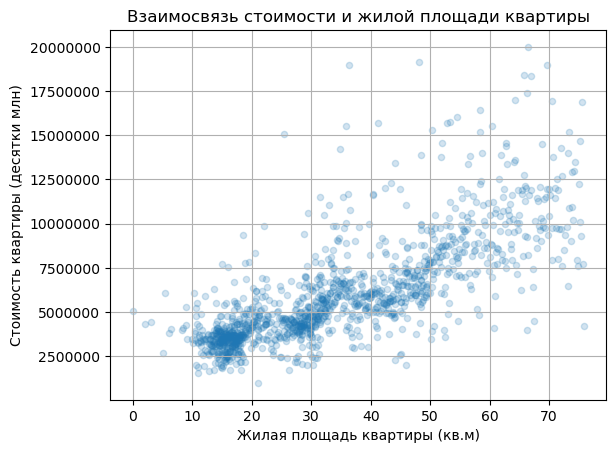

In [87]:
# создадим сводную таблицу по стоимости и жилой площади квартиры
living_area_pivot = data.pivot_table(index='living_area', values=['last_price'], aggfunc='mean')
living_area_pivot = living_area_pivot.reset_index(drop=False)

# создадим диаграмму рассеивания к таблице
living_area_pivot.plot(
    x = 'living_area', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.2,
    title = 'Взаимосвязь стоимости и жилой площади квартиры',
    grid = True,
    xlabel = 'Жилая площадь квартиры (кв.м)',
    ylabel = 'Стоимость квартиры (десятки млн)'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

In [88]:
# дополним диаграмму корреляцией
round(living_area_pivot['living_area'].corr(living_area_pivot['last_price']), 2)

0.76

Как и следовало ожидать, здесь мы тоже наблюдаем отчетливую взаимосвязь между жилой площадью и стоимостью квартиры. Корреляция составляет 0,76, что меньше, чем у общей площади, однако так же демонстрирует сильную взаимообусловленность параметров. Эту особенность мы наблюдаем в большей пологости тренда диаграммы: динамика роста стоимости квартиры не такая сильная при росте жилой площади, как при росте общей.

##### Фактор площади кухни

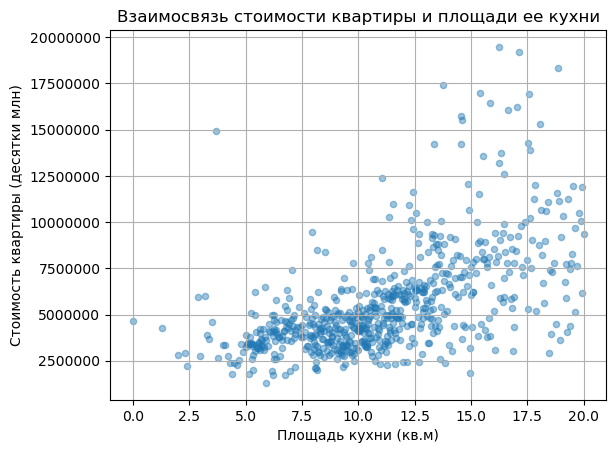

In [89]:
# создадим сводную таблицу по стоимости и площади кухни в квартире
kitchen_area_pivot = data.pivot_table(index='kitchen_area', values=['last_price'], aggfunc='mean')
kitchen_area_pivot = kitchen_area_pivot.reset_index(drop=False)

# создадим диаграмму рассеивания к таблице
kitchen_area_pivot.plot(
    x = 'kitchen_area', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.43,
    title = 'Взаимосвязь стоимости квартиры и площади ее кухни',
    grid = True,
    xlabel = 'Площадь кухни (кв.м)',
    ylabel = 'Стоимость квартиры (десятки млн)'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

In [90]:
# дополним диаграмму корреляцией
round(kitchen_area_pivot['kitchen_area'].corr(kitchen_area_pivot['last_price']), 2)

0.59

Мы наблюдаем похожий разброс, что и у жилой площади, хотя и менее выраженный. Корреляция составляет 0,59, что меньше, чем у двух предыдущих, однако это не отрицает ее наличия, демонстрируя среднюю взаимообусловленность. Тренд диаграммы такой же пологий, как и у тренда с жилой площадью.

##### Фактор количества комнат

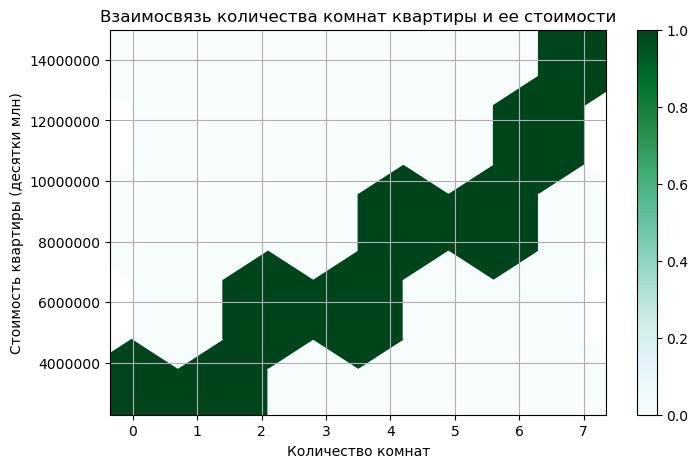

In [91]:
# создадим сводную таблицу по стоимости и количеству комнат в квартире
rooms_pivot = data.pivot_table(index='rooms', values=['last_price'], aggfunc='mean')
rooms_pivot = rooms_pivot.reset_index(drop=False)

# создадим диаграмму с шестиугольниками к таблице
rooms_pivot.plot(
    x='rooms', 
    y='last_price', 
    title = 'Взаимосвязь количества комнат квартиры и ее стоимости',
    xlabel = 'Количество комнат',
    ylabel = 'Стоимость квартиры (десятки млн)',
    kind='hexbin', 
    gridsize=5, 
    figsize=(8, 5), 
    sharex=False, 
    grid=True
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

In [92]:
# дополним диаграмму корреляцией
round(rooms_pivot['rooms'].corr(rooms_pivot['last_price']), 2)

0.97

В случае с количеством комнат в квартире мы наблюдаем отчетливую корреляцию в 0,96, что подтвержается достаточно равномерным трендом.

##### Фактор этажа

Поскольку нечисловое значение текстовой категориальной переменной не отобразит корреляции, переведем категории к числовым значениям.

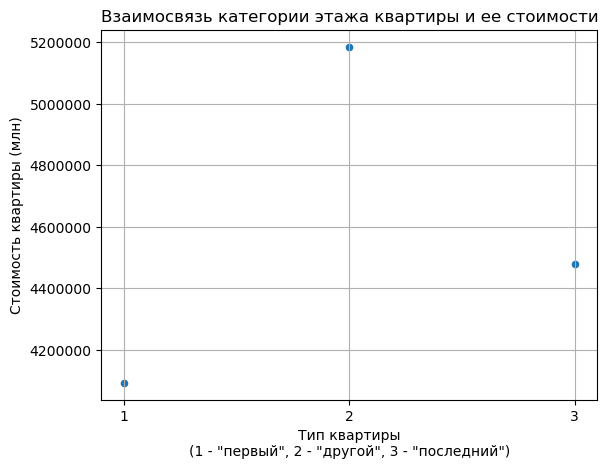

In [93]:
# создадим сводную таблицу по стоимости и категории этажа
floor_pivot = data.pivot_table(index='floor_category_number', values=['last_price'], aggfunc='mean')
floor_pivot = floor_pivot.reset_index(drop=False)

# создадим диаграмму рассеивания к таблице
floor_pivot.plot(
    x = 'floor_category_number', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 1,
    title = 'Взаимосвязь категории этажа квартиры и ее стоимости',
    grid = True,
    xlabel = 'Тип квартиры\n(1 - "первый", 2 - "другой", 3 - "последний")',
    ylabel = 'Стоимость квартиры (млн)',
    xticks = [1, 2, 3]
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

In [94]:
# дополним диаграмму корреляцией
round(floor_pivot['floor_category_number'].corr(floor_pivot['last_price']), 2)

0.35

Корреляция категории этажа и стоимости квартиры составляет 0,35, что хоть и указывает на слабую взаимосвязь, но вполне объясняется резким подъемом в количестве квартир в категории `другой`, что и дает некоторую основу для подсчета слабых 0,35. В данном случае взаимосвязи между показателями не наблюдается.

##### Фактор даты размещения

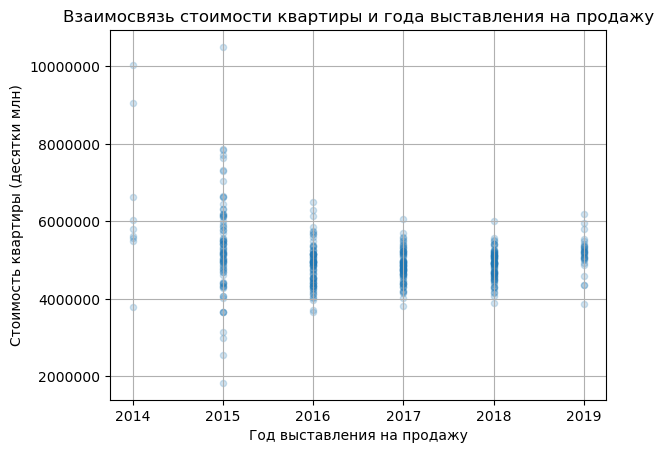

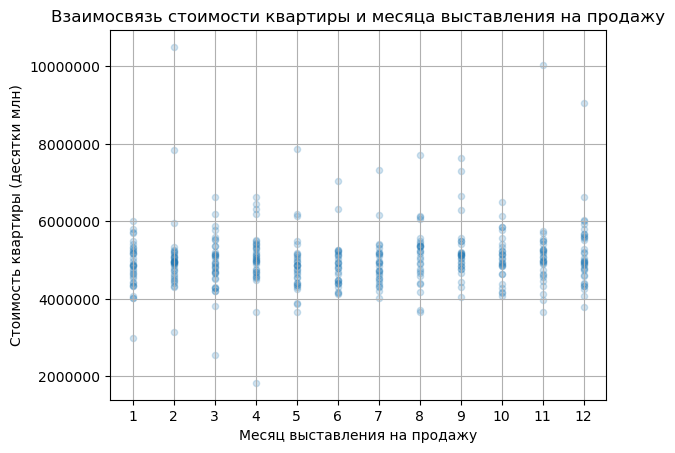

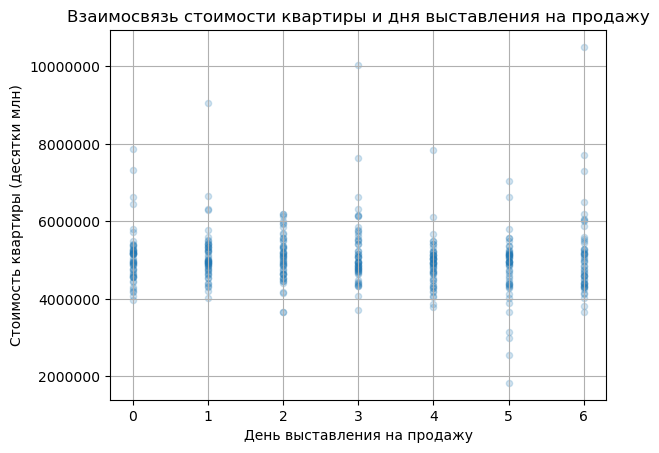

In [95]:
# создадим сводную таблицу по стоимости и дате размещения объявления
date_pivot = data.pivot_table(
    index=['exposition_year', 'exposition_month', 'exposition_day'], 
    values=['last_price'], 
    aggfunc='mean'
)
date_pivot = date_pivot.reset_index(drop=False)

# создадим диаграмму рассеивания к таблице
date_pivot.plot(
    x = 'exposition_year', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.2,
    title = 'Взаимосвязь стоимости квартиры и года выставления на продажу',
    grid = True,
    xlabel = 'Год выставления на продажу',
    ylabel = 'Стоимость квартиры (десятки млн)'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')

date_pivot.plot(
    x = 'exposition_month', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.2,
    title = 'Взаимосвязь стоимости квартиры и месяца выставления на продажу',
    grid = True,
    xlabel = 'Месяц выставления на продажу',
    ylabel = 'Стоимость квартиры (десятки млн)',
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')

date_pivot.plot(
    x = 'exposition_day', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.2,
    title = 'Взаимосвязь стоимости квартиры и дня выставления на продажу',
    grid = True,
    xlabel = 'День выставления на продажу',
    ylabel = 'Стоимость квартиры (десятки млн)'
)
# отменим научное отображение значений по оси y
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

Равномерная плотность значений на одном уровне свидетельствует об отсутствии взаимосвязи временных характеристик со стоимостью квартир, а корреляцию высчитывать не имеет смысла ввиду отсутствия линейной связи между параметрами.

###### Промежуточный вывод:

Такие факторы, как площадь объекта недвижимости (как общая, так и жилая и кухонная) и количество комнат, непосредственно влияют на стоимость объекта недвижимости. В особенности сильно на стоимость квартиры влияют такие показатели, как общая площадь и количество комнат. Этаж объекта и дата размещения вне зависимости от сезонности не влияют на стоимость квартиры.

#### Зависимость цены объекта недвижимости от населенного пункта

На стоимость объекта влияет не только его внутренние характеристики, но и расположение. Посмотрим, как удаленность от центра влияет на цену квадратного метра объекта, а также выявим населенные пункты с нибольшим количеством объявлений о продаже.  
Для начала выявим 10 населенных пунктов с наибольшим количеством объявлений.

In [96]:
data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      13205
поселок Мурино         548
поселок Шушары         433
Всеволожск             384
поселок Парголово      324
Пушкин                 324
Колпино                322
Гатчина                298
деревня Кудрово        286
Выборг                 213
Name: locality_name, dtype: int64

In [97]:
# создадим сводную таблицу, группирующую строки по месту и высчитывающую кол-во строк и среднее по цене за кв.м.
price_per_square_pivot = data.pivot_table(
    index='locality_name', 
    values=['last_price', 'price_per_square'], 
    aggfunc={'last_price':'count', 'price_per_square':'mean'},
    sort=True
)
price_per_square_pivot = price_per_square_pivot.reset_index(drop=False)
price_per_square_pivot = price_per_square_pivot.sort_values(by='last_price', ascending=False)
price_per_square_pivot = price_per_square_pivot.rename(columns={'locality_name':'locality', 'last_price':'number'})
price_per_square_pivot.reset_index(drop=True).head(10)

,locality,number,price_per_square
0,Санкт-Петербург,13205,107416.290472
1,поселок Мурино,548,85630.423467
2,поселок Шушары,433,78519.913233
3,Всеволожск,384,66977.018490
4,поселок Парголово,324,90296.933179
5,Пушкин,324,100888.112469
6,Колпино,322,75432.048478
7,Гатчина,298,68594.006376
8,деревня Кудрово,286,92964.892308
9,Выборг,213,57874.097089


Как мы видим, наибольшее количество объявлений приходится на Санкт-Петербург с наибольшим средним показателем цена за кв.м. Наименьшую среднюю цену за кв.м. демонстрирует Выборг: около 58000 за кв.м., что во многом объясняется удаленностью города от Санкт-Петербурга.

#### Зависимость цены объекта недвижимости от центра Санкт-Петербурга

In [98]:
# отфильтруем квартиры в Санкт-Петербурге в отдельный датафрейм
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

# сгруппируем данные по расстоянию от центра и выведем среднее для каждой дистанции
data_spb = data_spb.groupby('center_distance')[['center_distance','price_per_square']].mean()
data_spb = data_spb.reset_index(drop=True)
data_spb.head()

,center_distance,price_per_square
0,0.0,121803.097436
1,1.0,133740.404286
2,2.0,124076.365417
3,3.0,115129.273401
4,4.0,123485.373324


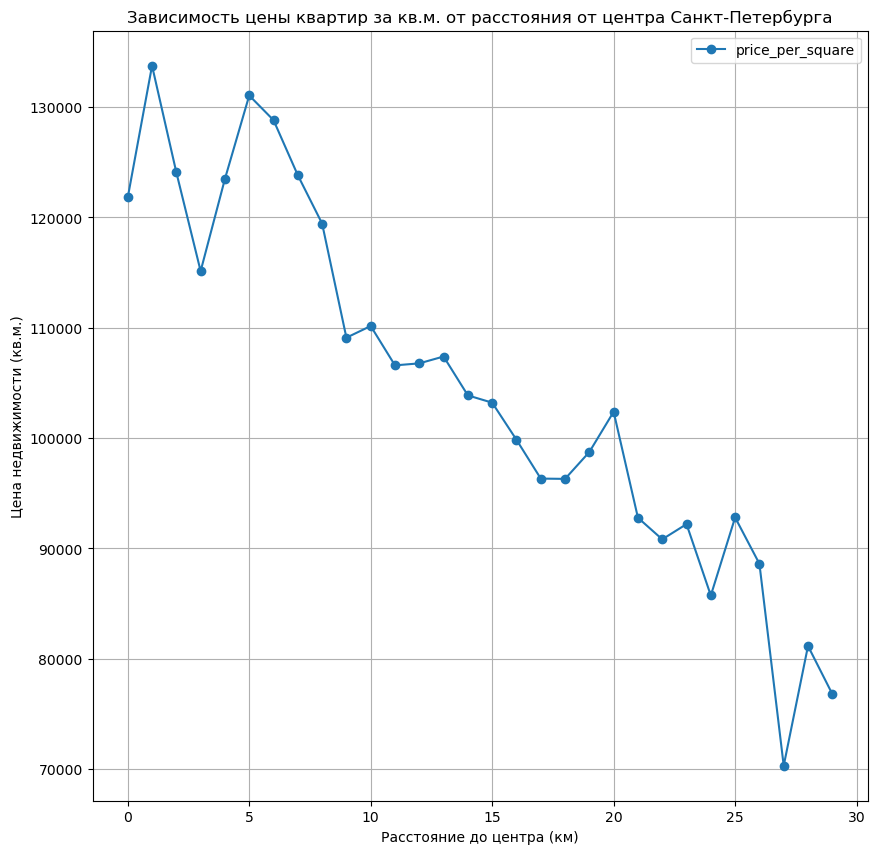

In [99]:
# создадим график изменения цены за кв.м. на каждый км отдаления от центра
data_spb.plot(
    x='center_distance',
    y='price_per_square',
    kind='line',
    figsize=(10,10),
    title = 'Зависимость цены квартир за кв.м. от расстояния от центра Санкт-Петербурга',
    grid = True,
    style = '-o',
    xlabel = 'Расстояние до центра (км)',
    ylabel = 'Цена недвижимости (кв.м.)'
)
plt.show()

Как можно наблюдать из графика `Зависимость цены квартир за кв.м. от расстояния от центра Санкт-Петербурга`, цена за кв.м. в зависимости от удаления от центра постепенно спадает на 3-4 тыс. Также заметно, что после 8 км динамика падения цены снижается. Несмотря на волатильный характер показателей на каждый км отдаления, прослеживается общий тренд обратной корреляции показателей цены за кв.м. и расстояния до центра в км.

### Выводы по результатам проекта
#### Обзор данных
Данный датасет предоставляет данные по объявлениям объектов недвижимости в сервисе "Яндекс Недвижимость". В датасет включена основная информация о квартирах, включая:

+ площадь объектов (общая, жилая, площадь кухни),
+ стоимость объекта,
+ срок выставления объявления (день выставления и количество дней в сервисе)
+ общая информация об объекте (этажность, комнаты, балконы, планировка и др.),
+ расположение объекта (населенный пункт, расстояние от центра СПб и аэропорта),
+ инфраструктурные особенности (наличие парков и водоемов поблизости).

Общий размер датасета перед предобработкой данных - 23699 вхождений, после - 20829 вхождений. Данный объем представляется достаточным для выводов, связанных с рынком недвижимости в Санкт-Петербурге и Ленинградской области, однако ввиду критичных пропусков в столбцах, связанных с автоматическим заполнением информации об объектах недвижимости и их инфраструктуре, ряд выводов потребуют дополнительных исследований и обогащения данных.

#### Методология

##### Предобработка данных
Поскольку датасет был представлен в "сыром" виде, потребовалась предобработка данных по следующим пунктам:

+ устарнение пропусков,
+ приведение данных к изначальному виду,
+ приведение данных к иному типу,
+ устранение неявных дубликатов,
+ корректное наименование столбцов.

Так, высота потолков в части строк показывала аномальные значения, что создавало некорректное отражение данной характеристики. Значения были по возможности исправлены (изменение единиц измерения), а аномалии удалены. Изменение типа значений затронуло такие сиолбцы, как дата создания объявления, а также ряд целочисленных значений, которые имели вещественное отображение. Неявные дубликаты были выявлены в названии населенных пунктов, где располагается объект. В основном причиной появления неявных дубликатов стало использование буквы "ё", а также непостоянное указание на статутс населенного пункта. Некоорректное наименование обнаружено у столбца, описывающего расстояние до центра города, - его имя было приведено к конвенциональному варианту, как это наблюдается у  остальных столбцов.

Отдельного упоминания требует работа по устранению пропусков и аномалий. Так, аномалии, выявленные во многих столбцах были удалены без критичного урона объему, а значит, и репрезентативности датасета, однако критичный объем пропусков обнаружен в автоматически заполняемых сервисом столбцах, что не позволяет удалить их ввиду массивного объема. По этой причине пропуски в данных столбцах были исправлены на нулевые значения. При анализе данных данные значения получили свое отображение (напр., распределения), однако в исследовании конкретных запросов не учитывались и не рассматривались в отдельных распределениях. Данная проблема в представленном датасете описана более подробно в блоке *"Баг-репорт"*.

##### Обогащение данных
Для более подробного исследования ключевых показателей на рынке недвижимости в Санкт-Петербурге и Ленинградской области потребовалось дополнить датасет новыми столбцами со следующей информацией:

+ цена квадратного метра недвижимости относительно заявленной площади и стоимости,
+ день, месяц и год выставления объявления,
+ категоризация этажа объекта,
+ отдаленность объекта от центра СПб (в км)

Данные столбцы были добавлены в датасет с целью дальнейшего анализа клюевых показателей рынка недвижимости и их зависимости от сторонних факторов, выведенных в обновленных столбцах.

##### Анализ данных на предмет наличия зависимостей по ключевым параметрам
Анализ данных проходил в несколько этапов:

1) Нормализация выборок по столбцам на основе статистического описания

Данный этап подразумевает проверку и исправление основных столбцов на предмет статистической типичности значений. При выявлении аномалий производилась проверка их доли от общей выборки. При удовлетворительном объеме аномалий проводилось их удаление.

2) Выявление динамики продаж, выставленных объектов недвижимости

Этот этап подразумевал статистическую оценку выборки по количеству дней объявления с момента выставления до продажи. На основе описания и анализа  распределения были выявлены сроки для стандартной, быстрой и медленной продажи.

3) Выявление факторов стоимости объекта недвижимости

Данный этап включает выявление корреляции между рядом сторонних показателей недвижимости и их объявлений в сервисе. Так, проводился анализ на предмет взаимодействия на стоимость таких параметров, как площадь, количество комнат, типа этажа, дата выставления на продажу.

4) Выявления зависимости цены объекта от населенного пункта

На этом этапе были выявлены лидеры среди населенных пунктов(10) по количеству объявлений и их средняя цена за кв.метр. Также выявлены максимальные и минимальные показатели по цене и количеству объявлений в выявленном срезе.

5) Выявление зависимости цена объекта недвижимости от удаленности от центра СПб

Данный этап рассматривает зависимость цены за кв.метр в Санкт-Петербурге от удаленности от центра с учетом увелечения дистанции на каждый км.

#### Выводы
##### Динамика продаж
По факту анализа статистического описания и распределения выборки можно судить о длительности продажи квартиры на платформе сервиса, среди чего выделяются следующие группы:
1) стандартный срок продажи: в диапазоне 100-150 дней (среднее кол-во дней - 114 дней)
2) быстрый срок продажи: до 100 дней (крайне быстрый срок - менее 45 дней)
3) долгий срок продажи: от 150 дней

##### Факторы стоимости объекта недвижимости
На основе статистического описания и рассчитанного корреляционного коэффициента были выявлены следующие положительные корреляции стоимости объекта со следующими показателями:

1) общая площадь (сильная положительная корреляция)
2) жилая площадь (средняя положительная  корреляция с меньшей динамикой роста цена за кв.м. при увеличении показателя)
3) площадь кухни (слабая положительная корреляция, аналогичная п.2)
4) количество комнат (сильная положительная корреляция)

У следующих показателей корреляции со стоимостью объекта выявлено не было:
1) тип этажа
2) дата выставления объявления

##### Зависимость цены объекта недвижимости от населенного пункта
По факту анализа 10 наиболее частых населенных пунктов в объявлениях следует отметить следующее:
1) лидер по числу объявлений (60%) и стоимости за кв.м. (13.200 р.) - Санкт-Петербург
2) наименьшее число объявлений (1%) среди 10 самых частых населенных пунктов вместе со стомостью кв.м. (58.000 р.) - Выборг

##### Зависимость цены объекта недвижимости от центра Санкт-Петербурга
На основе анализа динамики изменения цены за кв.м. в Санкт-Петербурге на каждый км удаления от центра очевиден тренд уменьшения цены в среднем на 3-4 тыс.р., хотя график и демонстрирует волатильный характер. Данный характер указывает на необходимость выявления дополнительных факторов влияния на стоимость объекта недвижимости, что получает особое значение для специфики рынка в Санкт-Петербурге.

#### Баг-репорт
Наблюдается некорретное автоматическое заполнение данных об объектах недвижимости сревисом. Столбцы `airports_nearest`, `city_center_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` оставляют пропуски типа NaN для большинства объявлений объектов в Ленинградской области. Такая работа алгоритма связана с отдаленностью населенных пунктов от Санкт-Петербурга и недостаточностью георграфических данных о малых населенных пунктах.
Дополнительно к некорректному поведению сервиса наблюдается появление неявных дупликатов в названиях населенных пунктов, что, возможно, не дает сервису выявить населенный пункт среди географических данных на карте. Данное поведение может быть связано с пропусками в указанных выше столбцах.
В качестве предложения рекомендую добавить выбор населенного пункта из общей базы данных по изначальному совпадению ввода пользователем, а также предложение дополнить информацию самостоятельно пользователем при остутвии данных о населенном пункте перед выставлением объявления.